# Model Training and Predictions

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

from collections import Counter

import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.feature_selection import chi2, f_regression, f_classif, mutual_info_classif, mutual_info_regression 
from sklearn.feature_selection import SelectKBest, SelectFromModel, VarianceThreshold
from sklearn.impute import KNNImputer
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model as lm
from sklearn import neighbors
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn import model_selection as ms
from sklearn.model_selection import cross_val_score, cross_val_predict

sklearn.set_config(print_changed_only=False)

from xgboost.sklearn import XGBRegressor

from matplotlib import pyplot as plt

from ipynb.fs.full.Self_Written_Functions_Sheet import col_obj_list, nan_col_list, cols_nan_unique, nan_col_obj_list_fillna, fill_masvnrtype
from ipynb.fs.full.Self_Written_Functions_Sheet import rmse

In [2]:
hp_tree_fullyimputed = pd.read_csv('../hp_tree_fullyimputed.csv')
hp_linear_fullyimputed = pd.read_csv('../hp_linear_fullyimputed.csv')

hp_tree_fullyimputed

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,GarageYrModified
0,60,6,65.0,8450,2,0,1,1,1,1,1,6,3,3,1,4,7,5,2003,2003,2,2,15,15,2,196.0,2,3,3,2,3,4,1,706,6,0,150,856,2,1,1,1,856,854,0,1710,1,0,2,1,3,1,2,8,1,0,0,2,2003.0,2,2,548,3,3,1,0,61,0,0,0,0,0,0,0,0,2,2008,1,1,2003
1,20,6,80.0,9600,2,0,1,1,1,4,1,25,2,3,1,1,6,8,1976,1976,2,2,9,9,4,0.0,3,3,2,2,3,1,2,978,6,0,284,1262,2,1,1,1,1262,0,0,1262,0,1,2,0,3,1,3,6,1,1,3,2,1976.0,2,2,460,3,3,1,298,0,0,0,0,0,0,0,0,0,5,2007,1,1,1976
2,60,6,68.0,11250,2,0,2,1,1,1,1,6,3,3,1,4,7,5,2001,2002,2,2,15,15,2,162.0,2,3,3,2,3,3,1,486,6,0,434,920,2,1,1,1,920,866,0,1786,1,0,2,1,3,1,2,6,1,1,3,2,2001.0,2,2,608,3,3,1,0,42,0,0,0,0,0,0,0,0,9,2008,1,1,2001
3,70,6,60.0,9550,2,0,2,1,1,2,1,7,3,3,1,4,7,5,1915,1970,2,2,16,17,4,0.0,3,3,1,3,2,4,2,216,6,0,540,756,2,2,1,1,961,756,0,1717,1,0,1,0,3,1,2,7,1,1,2,6,1998.0,3,3,642,3,3,1,0,35,272,0,0,0,0,0,0,0,2,2006,1,2,1915
4,60,6,84.0,14260,2,0,2,1,1,4,1,14,3,3,1,4,8,5,2000,2000,2,2,15,15,2,350.0,2,3,3,2,3,2,1,655,6,0,490,1145,2,1,1,1,1145,1053,0,2198,1,0,2,1,4,1,2,9,1,1,3,2,2000.0,2,3,836,3,3,1,192,84,0,0,0,0,0,0,0,0,12,2008,1,1,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,6,62.0,7917,2,0,1,1,1,1,1,9,3,3,1,4,6,5,1999,2000,2,2,15,15,4,0.0,3,3,3,2,3,4,6,0,6,0,953,953,2,1,1,1,953,694,0,1647,0,0,2,1,3,1,3,7,1,1,3,2,1999.0,2,2,460,3,3,1,0,40,0,0,0,0,0,0,0,0,8,2007,1,1,1999
1456,20,6,85.0,13175,2,0,1,1,1,1,1,17,3,3,1,1,6,6,1978,1988,2,2,11,11,5,119.0,3,3,2,2,3,4,2,790,4,163,589,1542,2,3,1,1,2073,0,0,2073,1,0,2,0,3,1,3,7,2,2,3,2,1978.0,3,2,500,3,3,1,349,0,0,0,0,0,0,2,0,0,2,2010,1,1,1978
1457,70,6,66.0,9042,2,0,1,1,1,1,1,7,3,3,1,4,7,9,1941,2006,2,2,6,6,4,0.0,1,2,5,3,2,4,1,275,6,0,877,1152,2,1,1,1,1188,1152,0,2340,0,0,2,0,4,1,2,9,1,2,2,2,1941.0,2,1,252,3,3,1,0,60,0,0,0,0,0,1,4,2500,5,2010,1,1,1941
1458,20,6,68.0,9717,2,0,1,1,1,1,1,13,3,3,1,1,5,6,1950,1996,4,2,9,9,4,0.0,3,3,2,3,3,3,1,49,4,1029,0,1078,2,2,1,2,1078,0,0,1078,1,0,1,0,2,1,2,5,1,0,0,2,1950.0,3,1,240,3,3,1,366,0,112,0,0,0,0,0,0,0,4,2010,1,1,1950


In [3]:
hp_linear_fullyimputed

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,GarageYrModified,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_DNE,Alley_Grvl,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_DNE,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_DNE,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_DNE,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_DNE,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_DNE,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_DNE,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_DNE,GarageTy

In [4]:
hp_logsaleprice = pd.read_csv('../hp_logsaleprice.csv')

hp_logsaleprice

,SalePrice
0,12.247694
1,12.109011
2,12.317167
3,11.849398
4,12.429216
...,...
1455,12.072541
1456,12.254863
1457,12.493130
1458,11.864462


# *Penalized Linear Regressions*

In [5]:
xtrain, xtest, ytrain, ytest = ms.train_test_split(hp_linear_fullyimputed, hp_logsaleprice, test_size=0.2, random_state=0)

ytrain = ytrain.values.flatten()

In [6]:
lasso = Lasso(random_state=0, max_iter=1000000, normalize=True)

n_folds_lin = ms.KFold(n_splits=5, random_state=0, shuffle=True)

Wall time: 4min 56s
##################################################


Currently, the best parameters are:  {'alpha': 1e-08}
where the alpha is:  1e-08
##################################################


The best score is:  0.9536883289107595
##################################################


The RMSE is:  0.08647330817520398


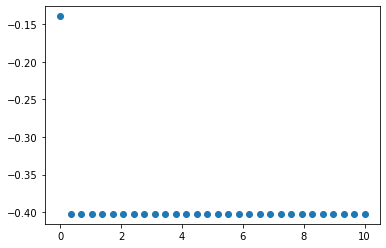

In [7]:
alphas = np.linspace(1e-8, 1e1, 30)

gparam_lasso = [{'alpha': alphas}]

gs_lasso = GridSearchCV(lasso, gparam_lasso, cv=n_folds_lin, scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_lasso.fit(xtrain, ytrain)

print('#'*50)
print('\n')

print('Currently, the best parameters are: ', gs_lasso.best_params_)

print('where the alpha is: ', gs_lasso.best_params_['alpha'])

print('#'*50)
print('\n')

print('The best score is: ', gs_lasso.best_estimator_.score(xtrain, ytrain))

print('#'*50)
print('\n')

print('The RMSE is: ', rmse(gs_lasso, ytrain, xtrain))

plt.scatter(gs_lasso.cv_results_['param_alpha'], gs_lasso.cv_results_['mean_test_score'])

Wall time: 3min 44s
##################################################


Currently, the best parameters are:  {'alpha': 0.00017242206896551725}
where the alpha is:  0.00017242206896551725
##################################################


The best score is:  0.9356701799254958
##################################################


The RMSE is:  0.10191615161358442


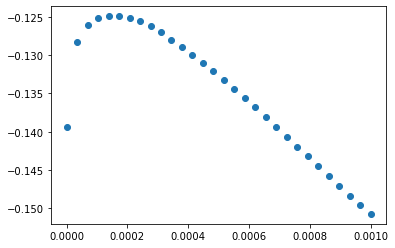

In [8]:
alphas = np.linspace(1e-8, 1e-3, 30)

gparam_lasso = [{'alpha': alphas}]

gs_lasso = GridSearchCV(lasso, gparam_lasso, cv=n_folds_lin, scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_lasso.fit(xtrain, ytrain)

print('#'*50)
print('\n')

print('Currently, the best parameters are: ', gs_lasso.best_params_)

print('where the alpha is: ', gs_lasso.best_params_['alpha'])

print('#'*50)
print('\n')

print('The best score is: ', gs_lasso.best_estimator_.score(xtrain, ytrain))

print('#'*50)
print('\n')

print('The RMSE is: ', rmse(gs_lasso, ytrain, xtrain))

plt.scatter(gs_lasso.cv_results_['param_alpha'], gs_lasso.cv_results_['mean_test_score'])

The test set RMSE is:  0.22081517033230433


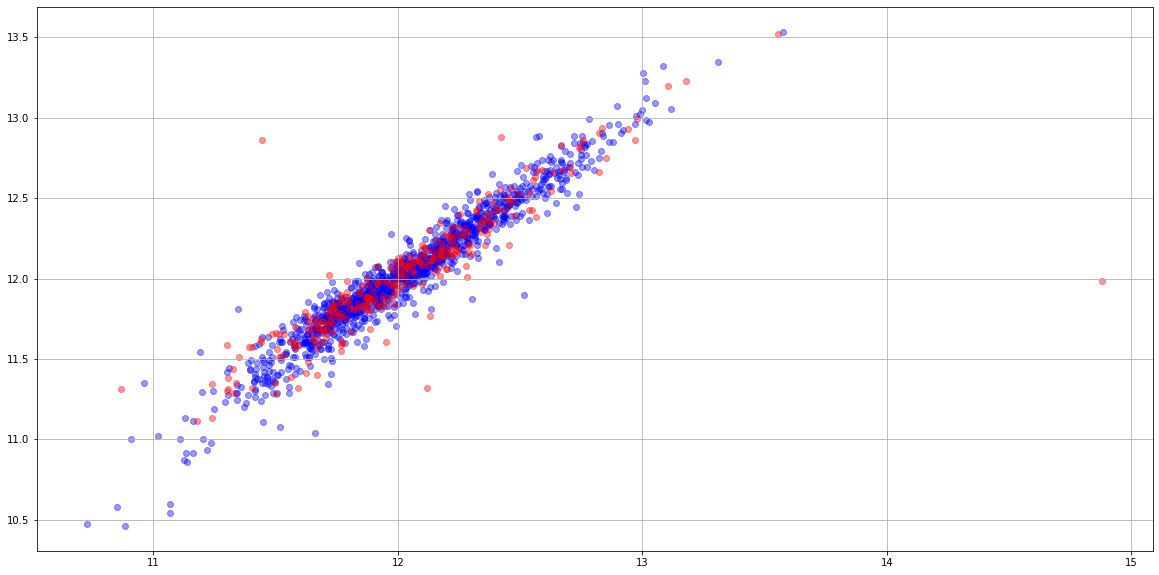

In [9]:
print('The test set RMSE is: ', rmse(gs_lasso, ytest, xtest))

plt.figure(figsize=(20, 10))
plt.scatter(gs_lasso.best_estimator_.predict(xtrain), ytrain, color='blue', alpha=0.4)
plt.scatter(gs_lasso.best_estimator_.predict(xtest), ytest, color='red', alpha=0.4)
plt.grid(which='both')

### Select more important features

In [10]:
lasso = Lasso(alpha=gs_lasso.best_params_['alpha'], random_state=0, max_iter=1000000, normalize=True)

lasso.fit(xtrain, ytrain)

lasso_coef = pd.Series(lasso.coef_)

lasso_coef_index = [i for i, x in enumerate(lasso_coef) if abs(x) > 0]

hp_linear_selected = hp_linear_fullyimputed.iloc[:,lasso_coef_index]

hp_linear_selected

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,KitchenAbvGr,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,ScreenPorch,GarageYrModified,MSZoning_C (all),MSZoning_FV,MSZoning_RM,Alley_Pave,LotShape_IR2,LotShape_Reg,LotConfig_CulDSac,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NridgHt,Neighborhood_Somerst,Neighborhood_StoneBr,Condition1_Artery,Condition1_Norm,Condition1_RRAe,Condition2_PosN,BldgType_1Fam,BldgType_Twnhs,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_HdBoard,Exterior1st_Wd Sdng,MasVnrType_Stone,ExterQual_TA,ExterCond_Fa,Foundation_PConc,BsmtQual_Ex,BsmtCond_Fa,BsmtExposure_Gd,BsmtExposure_No,BsmtFinType1_GLQ,BsmtFinType2_BLQ,Heating_Grav,HeatingQC_Ex,HeatingQC_Fa,CentralAir_N,CentralAir_Y,KitchenQual_Ex,KitchenQual_TA,Functional_Maj2,Functional_Typ,FireplaceQu_DNE,GarageType_2Types,GarageType_Attchd,GarageFinish_Unf,GarageQual_Gd,GarageCond_TA,PavedDrive_N,PoolQC_Gd,Fence_GdWo,SaleType_CWD,SaleType_ConLD,SaleType_New,SaleCondition_Abnorml,LotFrontage
0,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.575425,-0.288653,-0.459303,0.370333,1.107810,0.789741,1.227585,-0.211454,-0.951226,0.296026,0.311725,0.351000,-0.752176,0.216503,-0.270208,1.050994,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,-0.229372
1,-0.091886,-0.071836,2.179628,0.156734,-0.429577,1.171992,-0.288653,0.466465,-0.482512,-0.819964,0.789741,-0.761621,-0.211454,0.600495,0.236495,0.311725,-0.060731,1.626195,-0.704483,-0.270208,0.156734,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0.451936
2,0.073480,0.651479,-0.517200,0.984752,0.830215,0.092907,-0.288653,-0.313369,0.515013,1.107810,0.789741,1.227585,-0.211454,0.600495,0.291616,0.311725,0.631726,-0.752176,-0.070361,-0.270208,0.984752,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,-0.093110
3,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.499274,-0.288653,-0.687324,0.383659,1.107810,-1.026041,-0.761621,-0.211454,0.600495,0.285002,1.650307,0.790804,-0.752176,-0.176048,-0.270208,-1.863632,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,-0.456474
4,0.375148,1.374795,-0.517200,0.951632,0.733308,0.463568,-0.288653,0.199680,1.299326,1.107810,0.789741,1.227585,-0.211454,0.600495,0.289412,1.650307,1.698485,0.780197,0.563760,-0.270208,0.951632,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0.633618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.260560,-0.071836,-0.517200,0.918511,0.733308,-0.973018,-0.288653,-0.238122,0.250402,-0.819964,0.789741,1.227585,-0.211454,0.600495,0.287207,0.311725,-0.060731,-0.752176,-0.100558,-0.270208,0.918511,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,-0.365633
1456,0.266407,-0.071836,0.381743,0.222975,0.151865,0.759659,0.722112,1.104925,1.061367,1.107810,0.789741,-0.761621,-0.211454,2.152216,0.240904,0.311725,0.126420,2.033231,-0.704483,-0.270208,0.222975,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0.679039
1457,-0.147810,0.651479,3.078570,-1.002492,1.024029,-0.369871,-0.288653,0.215641,1.569647,-0.819964,0.789741,-0.761621,-0.211454,2.152216,0.159324,-1.026858,-1.033914,-0.752176,0.201405,-0.270208,-1.002492,0,0,

### Determining Outliers

#### Outlier on right side

In [11]:
# Create dataframe of xtest predictions
df_xtest = pd.DataFrame(gs_lasso.predict(xtest))
df_xtest.rename(columns={0:'SalePrice'}, inplace=True)

# Determine the highest value of the xtest predictions
plug_in = df_xtest[df_xtest['SalePrice']==gs_lasso.predict(xtest).max()]

# Plug that value into ytest to get the 'name' (which is actually the index) of the value 
ytest.iloc[plug_in.index]

,SalePrice
1298,11.982929


## The above was also an outlier in ML_HousingPrice_EDA_and_Basic_Imputation GrLivArea Exploration

#### Outlier on Left Side

In [12]:
# Creates list of indices that are within the specified bounds of ytest
ytest_ind = list(ytest[(ytest['SalePrice']>12.75) & (ytest['SalePrice']<13)]['SalePrice'].index)

# check for the indices around where our target may lie on the x axis
df_xtest[(df_xtest['SalePrice']>11.3) & (df_xtest['SalePrice']<11.6)]

# Creates list of indices that are within the specified bounds of df_xtest
xtest_ind = list(df_xtest[(df_xtest['SalePrice']>11.3) & (df_xtest['SalePrice']<11.6)]['SalePrice'].index)

# Creates list of indices that are within the specified bounds of ytest using xtest_ind
comparison_list = list(ytest.iloc[xtest_ind]['SalePrice'].index)
set(ytest_ind) & set(comparison_list)

{825}

### In ML_HousingPrice_EDA_and_Basic_Imputation, we saw that 523 was also an outlier

## Delete the outliers in the features and labels

In [13]:
hp_tree_fullyimputed_noOutliers = hp_tree_fullyimputed.drop([523, 825, 1298])

hp_linear_fullyimputed_noOutliers = hp_linear_fullyimputed.drop([523, 825, 1298])

hp_logsaleprice_noOutliers = hp_logsaleprice.drop([523, 825, 1298])

hp_linear_selected_noOutliers = hp_linear_selected.drop([523, 825, 1298])

## Re-run Lasso

In [14]:
xtrain_out, xtest_out, ytrain_out, ytest_out = ms.train_test_split(hp_linear_fullyimputed_noOutliers,
                                                                   hp_logsaleprice_noOutliers, 
                                                                   test_size=0.2,
                                                                   random_state=0)

ytrain_out = ytrain_out.values.flatten()

lasso = Lasso(random_state=0, max_iter=1000000, normalize=True)

n_folds_lin = ms.KFold(n_splits=5, random_state=0, shuffle=True)

In [15]:
alphas = np.linspace(1e-8, 0.0002, 30)

gparam_lasso_tree = [{'alpha': alphas}]

gs_lasso_tree = GridSearchCV(lasso,
                             gparam_lasso_tree, 
                             cv=n_folds_lin,
                             scoring='neg_root_mean_squared_error',
                             return_train_score=True)

%time gs_lasso_tree.fit(xtrain_out, ytrain_out)

print('#'*50)
print('\n')

print('Currently, the best parameters are: ', gs_lasso_tree.best_params_)

print('where the alpha is: ', gs_lasso_tree.best_params_['alpha'])

print('#'*50)
print('\n')

print('The best score is: ', gs_lasso_tree.best_estimator_.score(xtrain_out, ytrain_out))

print('#'*50)
print('\n')

print('The RMSE is: ', rmse(gs_lasso_tree, ytrain_out, xtrain_out))

Wall time: 2min 17s
##################################################


Currently, the best parameters are:  {'alpha': 0.00013103793103448277}
where the alpha is:  0.00013103793103448277
##################################################


The best score is:  0.9381153760658615
##################################################


The RMSE is:  0.09861960451076308


(array([-2.50e-05,  0.00e+00,  2.50e-05,  5.00e-05,  7.50e-05,  1.00e-04,
         1.25e-04,  1.50e-04,  1.75e-04,  2.00e-04,  2.25e-04]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

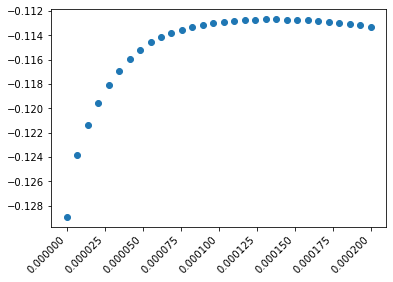

In [16]:
plt.scatter(gs_lasso_tree.cv_results_['param_alpha'], gs_lasso_tree.cv_results_['mean_test_score'])
plt.xticks(rotation=45, ha='right')

The test set RMSE is:  0.1154880025119205


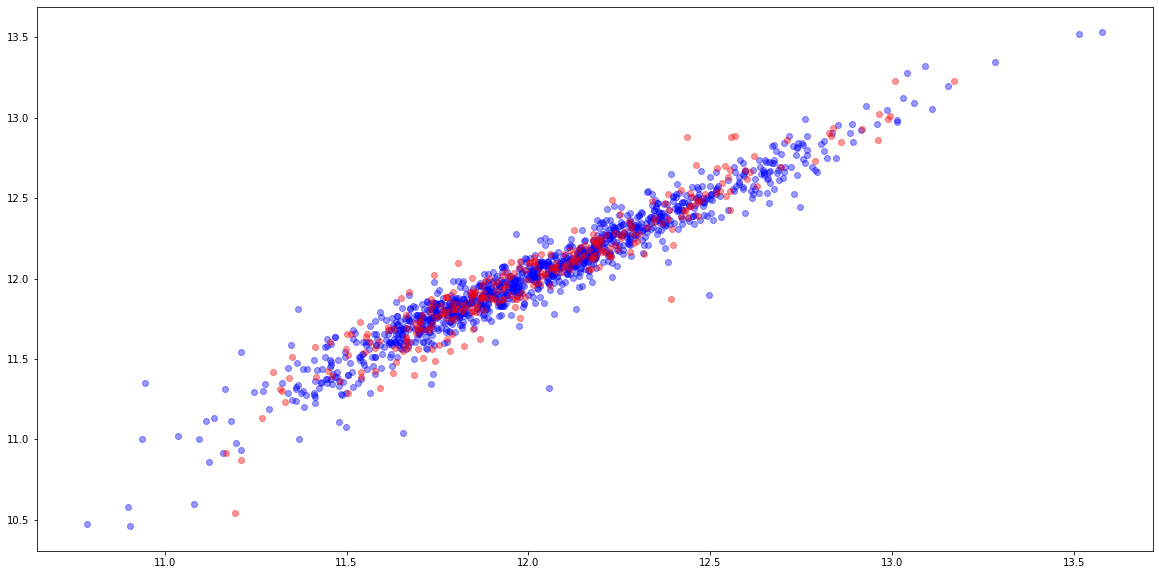

In [17]:
print('The test set RMSE is: ', rmse(gs_lasso_tree, ytest_out, xtest_out))

plt.figure(figsize=(20, 10))
plt.scatter(gs_lasso_tree.best_estimator_.predict(xtrain_out), ytrain_out, color='blue', alpha=0.4)
plt.scatter(gs_lasso_tree.best_estimator_.predict(xtest_out), ytest_out, color='red', alpha=0.4)

## Run using selected columns

In [18]:
xtrain_sel, xtest_sel, ytrain_sel, ytest_sel = ms.train_test_split(hp_linear_selected_noOutliers,
                                                                   hp_logsaleprice_noOutliers, 
                                                                   test_size=0.2,
                                                                   random_state=0)

ytrain_sel = ytrain_sel.values.flatten()

lasso = Lasso(random_state=0, max_iter=1000000, normalize=True)

n_folds_lin = ms.KFold(n_splits=5, random_state=0, shuffle=True)

Wall time: 1min 16s
##################################################


Currently, the best parameters are:  {'alpha': 3.1041379310344835e-05}
where the alpha is:  3.1041379310344835e-05
##################################################


The best score is:  0.9407702069409698
##################################################


The RMSE is:  0.09648104220459726
##################################################


The test set RMSE is:  0.11359292318600717


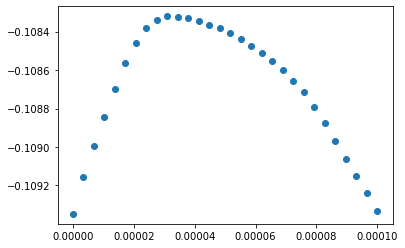

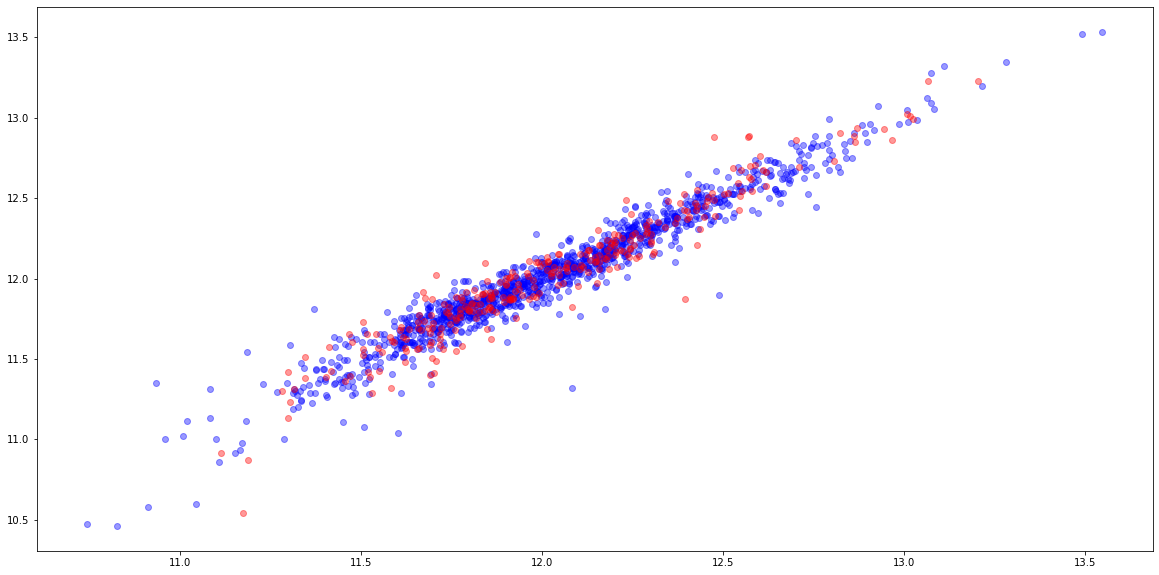

In [19]:
alphas = np.linspace(1e-8, 1e-4, 30)

gparam_lasso = [{'alpha': alphas}]

gs_lasso = GridSearchCV(lasso, gparam_lasso, cv=n_folds_lin, scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_lasso.fit(xtrain_sel, ytrain_sel)

print('#'*50)
print('\n')

print('Currently, the best parameters are: ', gs_lasso.best_params_)

print('where the alpha is: ', gs_lasso.best_params_['alpha'])

print('#'*50)
print('\n')

print('The best score is: ', gs_lasso.best_estimator_.score(xtrain_sel, ytrain_sel))

print('#'*50)
print('\n')

print('The RMSE is: ', rmse(gs_lasso, ytrain_sel, xtrain_sel))

print('#'*50)
print('\n')

print('The test set RMSE is: ', rmse(gs_lasso, ytest_sel, xtest_sel))

plt.scatter(gs_lasso.cv_results_['param_alpha'], gs_lasso.cv_results_['mean_test_score'])

plt.figure(figsize=(20, 10))
plt.scatter(gs_lasso.best_estimator_.predict(xtrain_sel), ytrain_sel, color='blue', alpha=0.4)
plt.scatter(gs_lasso.best_estimator_.predict(xtest_sel), ytest_sel, color='red', alpha=0.4)

# Run Multi Linear Regression

In [20]:
lm = LinearRegression()

scores = cross_val_score(lm, xtrain_sel, ytrain_sel, scoring='neg_root_mean_squared_error', cv=5)
print(scores)
print(np.mean(scores))

[-0.11917694 -0.10870621 -0.12242777 -0.14760836 -0.09576183]
-0.11873622120649716


Wall time: 4.45 s
##################################################


Currently, the best parameters are:  {'fit_intercept': True, 'normalize': True}
##################################################


The best score is:  0.9410512371854719
##################################################


The RMSE is:  0.09625188109862198
##################################################


The test set RMSE is:  0.11469572497913186


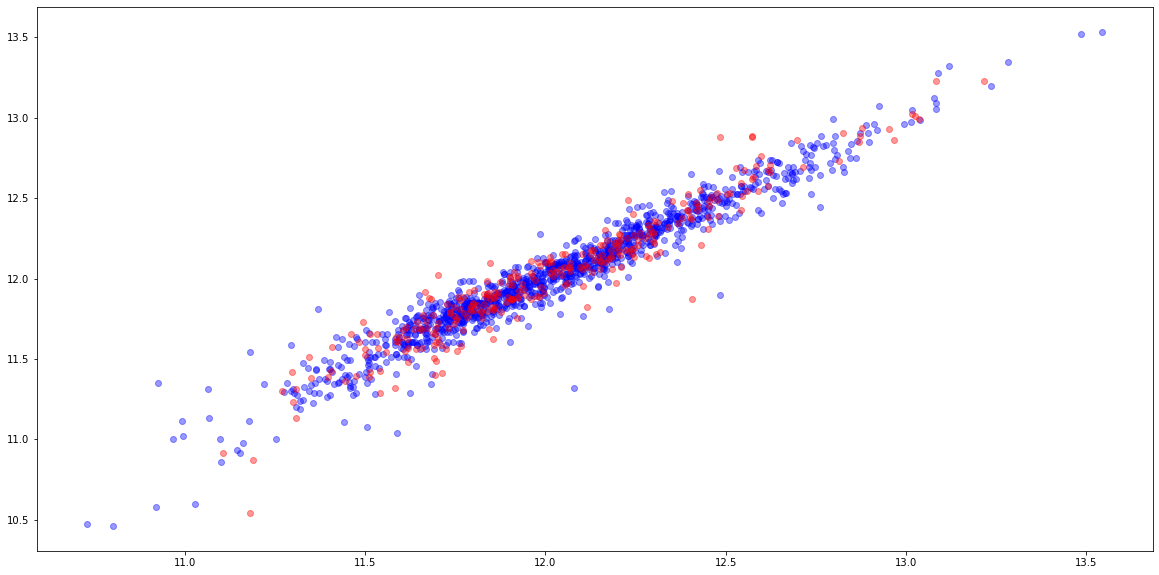

In [21]:
lm = LinearRegression()

fitintercept = [True, False]
norm = [True, False]

gparam_mlr = {'fit_intercept': fitintercept,
              'normalize': norm}

gs_mlr = ms.GridSearchCV(lm, gparam_mlr, cv=n_folds_lin, refit=True, n_jobs=-1,
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_mlr.fit(xtrain_sel, ytrain_sel)

print('#'*50)
print('\n')

print('Currently, the best parameters are: ', gs_mlr.best_params_)

# print('where the alpha is: ', gs_mlr.best_params_['alpha'])
# print('and the L1 ratio is: ', gs_mlr.best_params_['l1_ratio'])

print('#'*50)
print('\n')

print('The best score is: ', gs_mlr.best_estimator_.score(xtrain_sel, ytrain_sel))

print('#'*50)
print('\n')

print('The RMSE is: ', rmse(gs_mlr, ytrain_sel, xtrain_sel))

print('#'*50)
print('\n')

print('The test set RMSE is: ', rmse(gs_mlr, ytest_sel, xtest_sel))

plt.figure(figsize=(20, 10))
plt.scatter(gs_mlr.best_estimator_.predict(xtrain_sel), ytrain_sel, color='blue', alpha=0.4)
plt.scatter(gs_mlr.best_estimator_.predict(xtest_sel), ytest_sel, color='red', alpha=0.4)

# Run Elastic Net

Wall time: 1min 13s
##################################################


Currently, the best parameters are:  {'alpha': 6.158482110660255e-05, 'l1_ratio': 0.3792690190732246}
where the alpha is:  6.158482110660255e-05
and the L1 ratio is:  0.3792690190732246
##################################################


The best score is:  0.94017776541205
##################################################


The RMSE is:  0.09696236377037147
##################################################


The test set RMSE is:  0.11494256425904414


C:\Users\tdcho\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: RuntimeWarning: invalid value encountered in subtract
  array_means[:, np.newaxis]) ** 2,


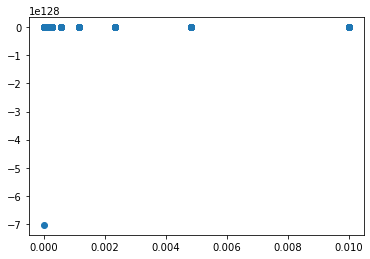

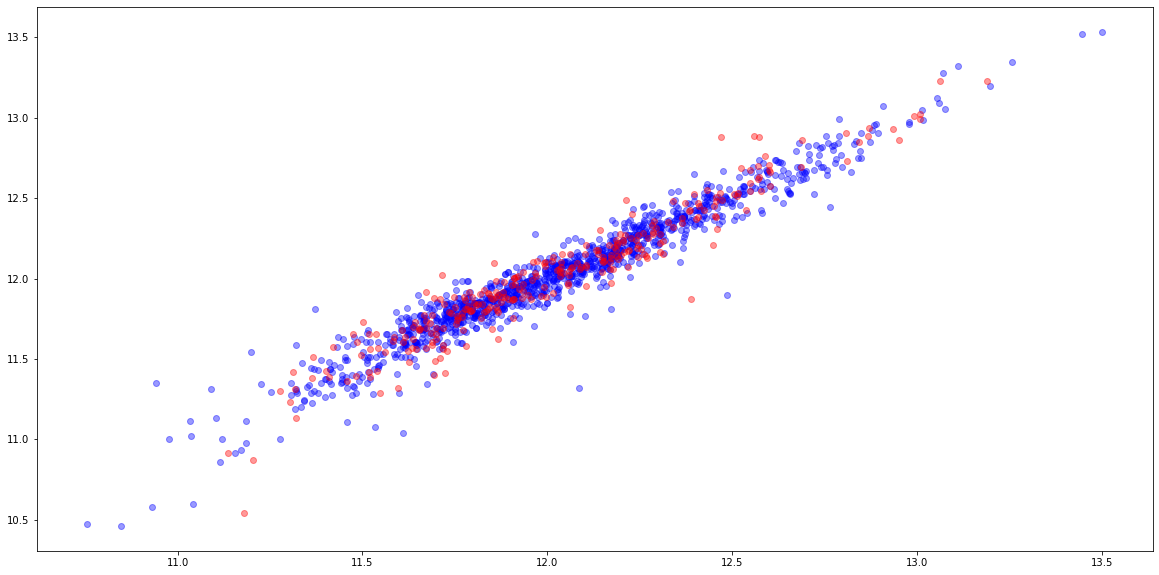

In [22]:
enet = ElasticNet(random_state=0, max_iter=10000, normalize=True)

alphas = np.logspace(-8, -2, 20)
rhos = np.logspace(-8, 1, 20)

gparam_enet = {'l1_ratio': rhos, 'alpha': alphas}

gs_enet = GridSearchCV(enet, gparam_enet, cv=n_folds_lin, refit=True, n_jobs=-1,
                       scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_enet.fit(xtrain_sel, ytrain_sel)

print('#'*50)
print('\n')

print('Currently, the best parameters are: ', gs_enet.best_params_)

print('where the alpha is: ', gs_enet.best_params_['alpha'])
print('and the L1 ratio is: ', gs_enet.best_params_['l1_ratio'])

print('#'*50)
print('\n')

print('The best score is: ', gs_enet.best_estimator_.score(xtrain_sel, ytrain_sel))

print('#'*50)
print('\n')

print('The RMSE is: ', rmse(gs_enet, ytrain_sel, xtrain_sel))

print('#'*50)
print('\n')

print('The test set RMSE is: ', rmse(gs_enet, ytest_sel, xtest_sel))

plt.scatter(gs_enet.cv_results_['param_alpha'], gs_enet.cv_results_['mean_test_score'])


plt.figure(figsize=(20, 10))
plt.scatter(gs_enet.best_estimator_.predict(xtrain_sel), ytrain_sel, color='blue', alpha=0.4)
plt.scatter(gs_enet.best_estimator_.predict(xtest_sel), ytest_sel, color='red', alpha=0.4)

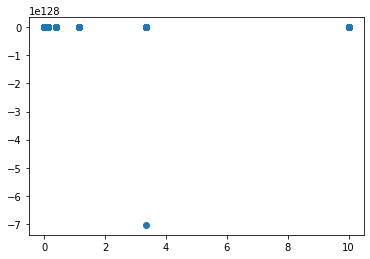

In [23]:
plt.scatter(gs_enet.cv_results_['param_l1_ratio'], gs_enet.cv_results_['mean_test_score'])

The test set RMSE is:  0.11494256425904414


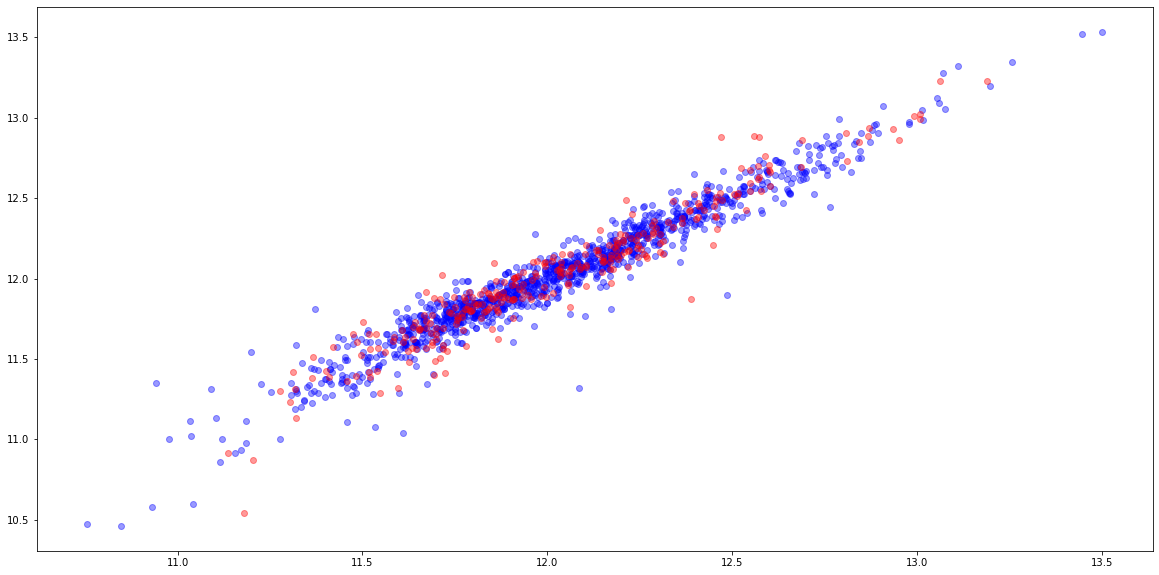

In [24]:
print('The test set RMSE is: ', rmse(gs_enet, ytest_sel, xtest_sel))

plt.figure(figsize=(20, 10))
plt.scatter(gs_enet.best_estimator_.predict(xtrain_sel), ytrain_sel, color='blue', alpha=0.4)
plt.scatter(gs_enet.best_estimator_.predict(xtest_sel), ytest_sel, color='red', alpha=0.4)

Wall time: 21.4 s
##################################################


Currently, the best parameters are:  {'alpha': 0.0016102620275609393, 'l1_ratio': 0.05298316906283707}
where the alpha is:  0.0016102620275609393
and the L1 ratio is:  0.05298316906283707
##################################################


The best score is:  0.9399267336419704
##################################################


The RMSE is:  0.09716559215434575
##################################################


The test set RMSE is:  0.11291301514741509


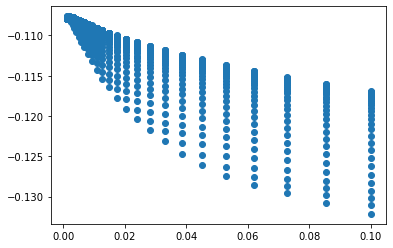

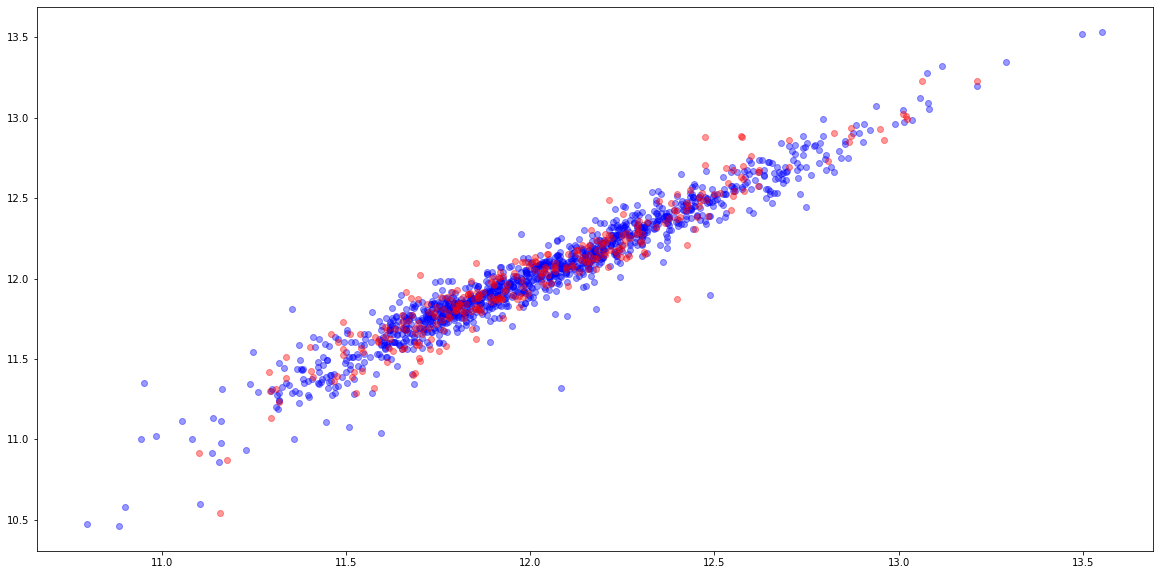

In [25]:
enet = ElasticNet(random_state=0, max_iter=10000)

alphas = np.logspace(-3, -1, 30)
rhos = np.logspace(-3, -1, 30)

gparam_enet = {'l1_ratio': rhos, 'alpha': alphas}

gs_enet = GridSearchCV(enet, gparam_enet, cv=n_folds_lin, refit=True, n_jobs=-1,
                       scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_enet.fit(xtrain_sel, ytrain_sel)

print('#'*50)
print('\n')

print('Currently, the best parameters are: ', gs_enet.best_params_)

print('where the alpha is: ', gs_enet.best_params_['alpha'])
print('and the L1 ratio is: ', gs_enet.best_params_['l1_ratio'])

print('#'*50)
print('\n')

print('The best score is: ', gs_enet.best_estimator_.score(xtrain_sel, ytrain_sel))

print('#'*50)
print('\n')

print('The RMSE is: ', rmse(gs_enet, ytrain_sel, xtrain_sel))

print('#'*50)
print('\n')

print('The test set RMSE is: ', rmse(gs_enet, ytest_sel, xtest_sel))

plt.scatter(gs_enet.cv_results_['param_alpha'], gs_enet.cv_results_['mean_test_score'])

plt.figure(figsize=(20, 10))
plt.scatter(gs_enet.best_estimator_.predict(xtrain_sel), ytrain_sel, color='blue', alpha=0.4)
plt.scatter(gs_enet.best_estimator_.predict(xtest_sel), ytest_sel, color='red', alpha=0.4)

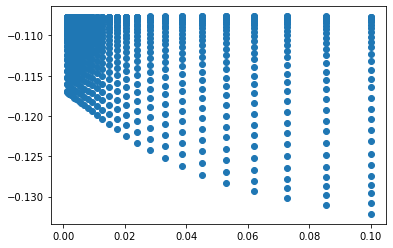

In [26]:
# These graphs do not show us much, but they are fun to see :]

plt.scatter(gs_enet.cv_results_['param_l1_ratio'], gs_enet.cv_results_['mean_test_score'])

## Gradient Boosting Regressions

In [27]:
xtrain_gb, xtest_gb, ytrain_gb, ytest_gb = ms.train_test_split(hp_tree_fullyimputed, 
                                                               hp_logsaleprice, test_size=0.2, random_state=0)

ytrain_gb = ytrain_gb.values.flatten()

### 1st Run

Wall time: 14min 11s
##################################################


Currently, the best parameters are:  {'learning_rate': 0.01, 'max_depth': 4, 'max_features': 9, 'n_estimators': 5000}
where the learning rate is:  0.01
and the number of estimators is:  5000
where the max features are:  9
and the max depth is:  4
##################################################


The best score is:  0.9975584872582721
##################################################


The RMSE is:  0.019854837885393606
##################################################


The test set RMSE is:  0.12193367342619259


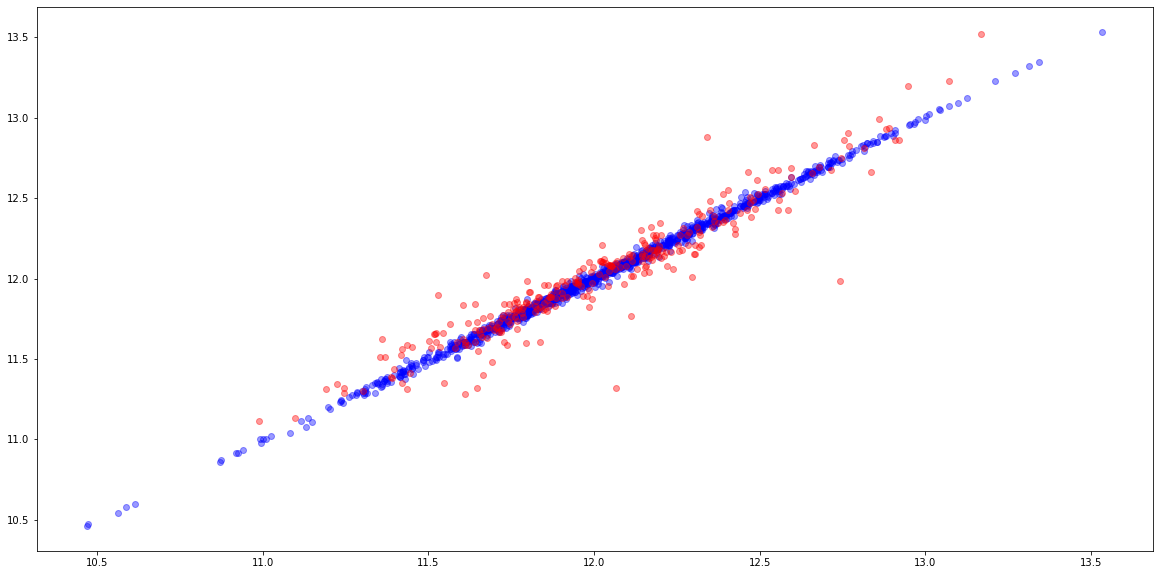

In [28]:
gbm = GradientBoostingRegressor()

learningrate = [0.0001, 0.001, 0.01, 0.1, 1] # subsequently, fine tune
nestimators = [5, 10, 50, 100, 200, 500, 1000, 1500, 2000, 5000]

maxfeatures = [9, 40, len(hp_tree_fullyimputed.columns)]
maxdepth = range(1, 5)

gparam_gbm = {'learning_rate': learningrate,
              'n_estimators': nestimators, 
              'max_features': maxfeatures,
              'max_depth': maxdepth}

n_folds=ms.KFold(n_splits=5, random_state=0, shuffle=True)

gs_gbm = GridSearchCV(gbm, gparam_gbm, cv=n_folds, refit=True, n_jobs=-1, 
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_gbm.fit(xtrain_gb, ytrain_gb)

print('#'*50)
print('\n')

print('Currently, the best parameters are: ', gs_gbm.best_params_)

print('where the learning rate is: ', gs_gbm.best_params_['learning_rate'])
print('and the number of estimators is: ', gs_gbm.best_params_['n_estimators'])
print('where the max features are: ', gs_gbm.best_params_['max_features'])
print('and the max depth is: ', gs_gbm.best_params_['max_depth'])

print('#'*50)
print('\n')

print('The best score is: ', gs_gbm.best_estimator_.score(xtrain_gb, ytrain_gb))

print('#'*50)
print('\n')

print('The RMSE is: ', rmse(gs_gbm, ytrain_gb, xtrain_gb))

print('#'*50)
print('\n')

print('The test set RMSE is: ', rmse(gs_gbm, ytest_gb, xtest_gb))

plt.figure(figsize=(20, 10))
plt.scatter(gs_gbm.best_estimator_.predict(xtrain_gb), ytrain_gb, color='blue', alpha=0.4)
plt.scatter(gs_gbm.best_estimator_.predict(xtest_gb), ytest_gb, color='red', alpha=0.4)

- We can see that there is a lot of overfitting compared to the test set


## Try tuning the model

18:21:44
Wall time: 15min 2s
##################################################


Currently, the best parameters are:  {'learning_rate': 0.05, 'max_depth': 5, 'max_features': 10, 'min_impurity_decrease': 0.01, 'min_samples_leaf': 10, 'min_samples_split': 6, 'n_estimators': 5000, 'subsample': 1, 'warm_start': False}
where the learning rate is:  0.05
and the number of estimators is:  5000
and the max features are:  10
and the max depth is:  5
and warm start is:  False
and the min # of samples to split nodes are:  6
and the mnimum samples at a leaf node are:  10
and the minimum impurity decrease is:  0.01
##################################################


The best score is:  0.786585657235968
##################################################


The RMSE is:  0.18563020723747778
##################################################


The test set RMSE is:  0.1855530104917605


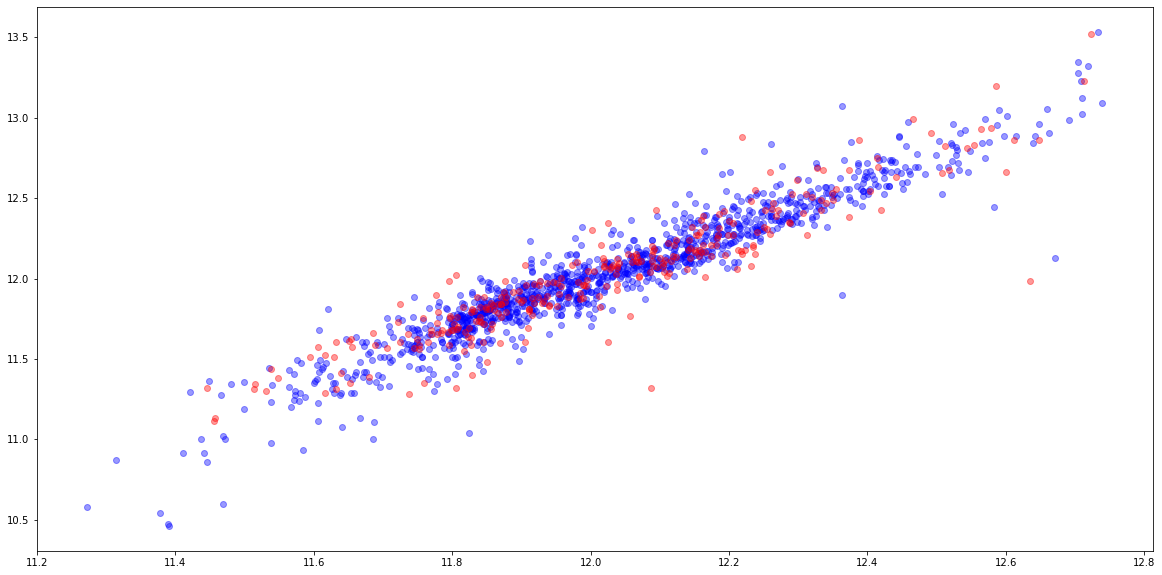

In [29]:
import time
t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)
print(current_time)

gbm = GradientBoostingRegressor(loss='ls', tol=1e-2, n_iter_no_change=5, validation_fraction=0.2)

learningrate = [0.001, 0.01, 0.05]
nestimators = [2000, 3000, 4000, 5000, 6000]
# np.linspace(1500, 2500, 9, dtype='int32')
subsamp = [0.01, 0.1, 1]

maxfeatures = range(7, 12)
maxdepth = range(3, 6)

warmstart = [True, False]

minsamlf = [4, 6, 8, 10]
minsamsplt = [4, 6, 8, 10]
minimpdec = [0.01, 0.1, 1]

gparam_gbm = {'learning_rate': learningrate,
              'n_estimators': nestimators, 
              'max_features': maxfeatures,
              'max_depth': maxdepth,
              'warm_start': warmstart,
              'min_samples_leaf': minsamlf,
              'min_samples_split': minsamsplt,
              'min_impurity_decrease': minimpdec,
              'subsample': subsamp
             }

n_folds=ms.KFold(n_splits=5, random_state=0, shuffle=True)

gs_gbm = GridSearchCV(gbm, gparam_gbm, cv=n_folds, refit=True, n_jobs=-1, 
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_gbm.fit(xtrain_gb, ytrain_gb)

print('#'*50)
print('\n')

print('Currently, the best parameters are: ', gs_gbm.best_params_)

print('where the learning rate is: ', gs_gbm.best_params_['learning_rate'])
print('and the number of estimators is: ', gs_gbm.best_params_['n_estimators'])
print('and the max features are: ', gs_gbm.best_params_['max_features'])
print('and the max depth is: ', gs_gbm.best_params_['max_depth'])
print('and warm start is: ', gs_gbm.best_params_['warm_start'])
print('and the min # of samples to split nodes are: ', gs_gbm.best_params_['min_samples_split'])
print('and the mnimum samples at a leaf node are: ', gs_gbm.best_params_['min_samples_leaf'])
print('and the minimum impurity decrease is: ', gs_gbm.best_params_['min_impurity_decrease'])

print('#'*50)
print('\n')

print('The best score is: ', gs_gbm.best_estimator_.score(xtrain_gb, ytrain_gb))

print('#'*50)
print('\n')

print('The RMSE is: ', rmse(gs_gbm, ytrain_gb, xtrain_gb))

print('#'*50)
print('\n')


print('The test set RMSE is: ', rmse(gs_gbm, ytest_gb, xtest_gb))
plt.figure(figsize=(20, 10))
plt.scatter(gs_gbm.best_estimator_.predict(xtrain_gb), ytrain_gb, color='blue', alpha=0.4)
plt.scatter(gs_gbm.best_estimator_.predict(xtest_gb), ytest_gb, color='red', alpha=0.4)

# Adjust parameters of the model

18:36:47
Wall time: 9min 14s
##################################################


Currently, the best parameters are:  {'learning_rate': 0.06, 'max_depth': 4, 'max_features': 9, 'min_impurity_decrease': 0.005, 'min_samples_leaf': 7, 'min_samples_split': 9, 'n_estimators': 4000, 'subsample': 0.8, 'warm_start': False}
where the learning rate is:  0.06
and the number of estimators is:  4000
and the max features are:  9
and the max depth is:  4
and warm start is:  False
and the min # of samples to split nodes are:  9
and the mnimum samples at a leaf node are:  7
and the minimum impurity decrease is:  0.005
##################################################


The best score is:  0.9250776451282298
##################################################


The RMSE is:  0.10998730416118993
##################################################


The test set RMSE is:  0.13967705677758627


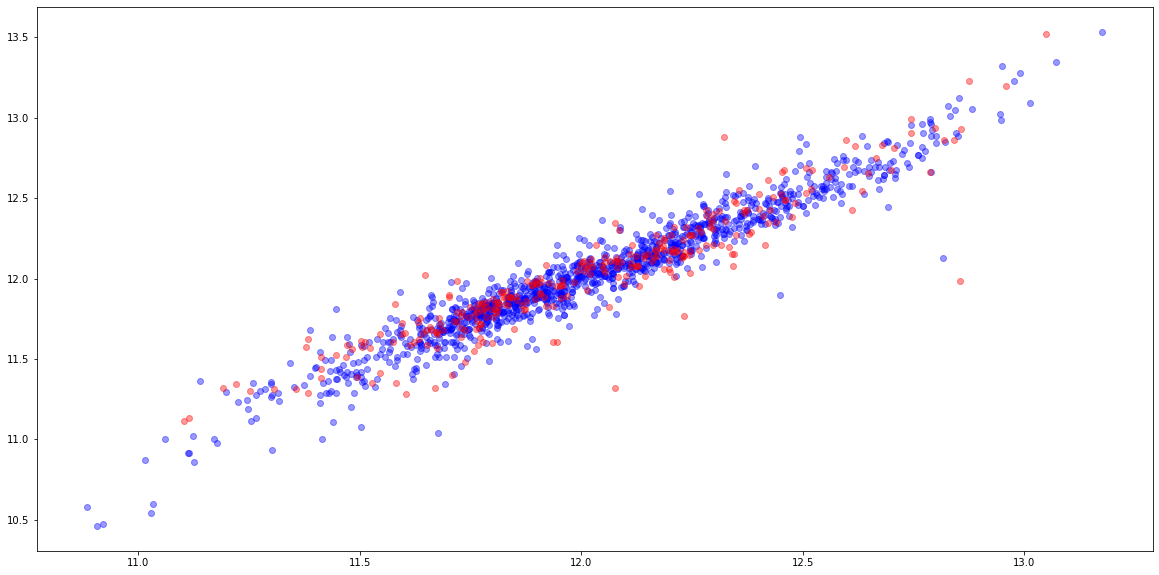

In [30]:
import time
t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)
print(current_time)

gbm = GradientBoostingRegressor(loss='ls', tol=1e-3, n_iter_no_change=10, validation_fraction=0.2)

learningrate = [0.04, 0.05, 0.06]
nestimators = [3750, 4000, 4250]
# np.linspace(1500, 2500, 9, dtype='int32')
subsamp = [0.8, 1, 1.2]

maxfeatures = range(8, 12)
maxdepth = range(4, 6)

warmstart = [True, False]

minsamlf = [7, 8, 9]
minsamsplt = [7, 8, 9]
minimpdec = [0.005, 0.01, 0.05]

gparam_gbm = {'learning_rate': learningrate,
              'n_estimators': nestimators, 
              'max_features': maxfeatures,
              'max_depth': maxdepth,
              'warm_start': warmstart,
              'min_samples_leaf': minsamlf,
              'min_samples_split': minsamsplt,
              'min_impurity_decrease': minimpdec,
              'subsample': subsamp
             }

n_folds=ms.KFold(n_splits=5, random_state=0, shuffle=True)

gs_gbm = GridSearchCV(gbm, gparam_gbm, cv=n_folds, refit=True, n_jobs=-1, 
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_gbm.fit(xtrain_gb, ytrain_gb)

print('#'*50)
print('\n')

print('Currently, the best parameters are: ', gs_gbm.best_params_)

print('where the learning rate is: ', gs_gbm.best_params_['learning_rate'])
print('and the number of estimators is: ', gs_gbm.best_params_['n_estimators'])
print('and the max features are: ', gs_gbm.best_params_['max_features'])
print('and the max depth is: ', gs_gbm.best_params_['max_depth'])
print('and warm start is: ', gs_gbm.best_params_['warm_start'])
print('and the min # of samples to split nodes are: ', gs_gbm.best_params_['min_samples_split'])
print('and the mnimum samples at a leaf node are: ', gs_gbm.best_params_['min_samples_leaf'])
print('and the minimum impurity decrease is: ', gs_gbm.best_params_['min_impurity_decrease'])

print('#'*50)
print('\n')

print('The best score is: ', gs_gbm.best_estimator_.score(xtrain_gb, ytrain_gb))

print('#'*50)
print('\n')

print('The RMSE is: ', rmse(gs_gbm, ytrain_gb, xtrain_gb))

print('#'*50)
print('\n')


print('The test set RMSE is: ', rmse(gs_gbm, ytest_gb, xtest_gb))
plt.figure(figsize=(20, 10))
plt.scatter(gs_gbm.best_estimator_.predict(xtrain_gb), ytrain_gb, color='blue', alpha=0.4)
plt.scatter(gs_gbm.best_estimator_.predict(xtest_gb), ytest_gb, color='red', alpha=0.4)

### Another tune

18:46:01
Wall time: 11min 43s
##################################################


Currently, the best parameters are:  {'learning_rate': 0.055, 'max_depth': 5, 'max_features': 11, 'min_impurity_decrease': 0.01, 'min_samples_leaf': 10, 'min_samples_split': 8, 'n_estimators': 4000, 'subsample': 0.6, 'warm_start': True}
where the learning rate is:  0.055
and the number of estimators is:  4000
and the max features are:  11
and the max depth is:  5
and warm start is:  True
and the min # of samples to split nodes are:  8
and the mnimum samples at a leaf node are:  10
and the minimum impurity decrease is:  0.01
##################################################


The best score is:  0.9194086287767474
##################################################


The RMSE is:  0.11407254224076759
##################################################


The test set RMSE is:  0.13962169700198515


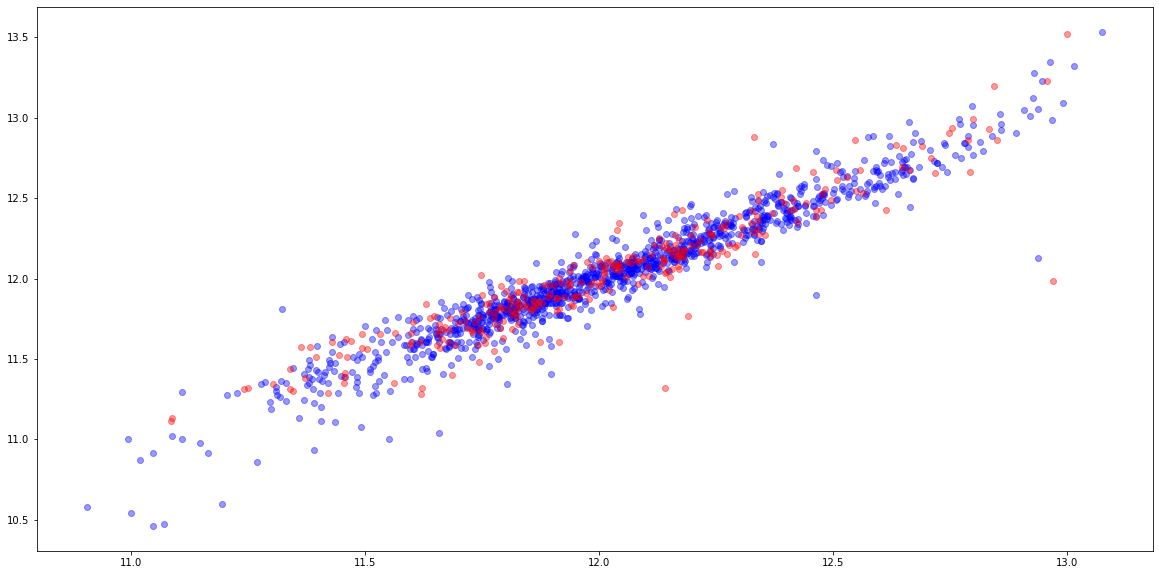

In [31]:
import time
t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)
print(current_time)

gbm = GradientBoostingRegressor(loss='ls', tol=1e-3, n_iter_no_change=8, validation_fraction=0.2)

learningrate = [0.045, 0.05, 0.055]
nestimators = [3500, 3750, 4000]
# np.linspace(1500, 2500, 9, dtype='int32')
subsamp = [0.6, 0.8, 1]

maxfeatures = range(9, 13)
maxdepth = range(4, 6)

warmstart = [True, False]

minsamlf = [8, 9, 10]
minsamsplt = [6, 7, 8]
minimpdec = [0.007, 0.01, 0.03]

gparam_gbm = {'learning_rate': learningrate,
              'n_estimators': nestimators, 
              'max_features': maxfeatures,
              'max_depth': maxdepth,
              'warm_start': warmstart,
              'min_samples_leaf': minsamlf,
              'min_samples_split': minsamsplt,
              'min_impurity_decrease': minimpdec,
              'subsample': subsamp
             }

n_folds=ms.KFold(n_splits=5, random_state=0, shuffle=True)

gs_gbm = GridSearchCV(gbm, gparam_gbm, cv=n_folds, refit=True, n_jobs=-1, 
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_gbm.fit(xtrain_gb, ytrain_gb)

print('#'*50)
print('\n')

print('Currently, the best parameters are: ', gs_gbm.best_params_)

print('where the learning rate is: ', gs_gbm.best_params_['learning_rate'])
print('and the number of estimators is: ', gs_gbm.best_params_['n_estimators'])
print('and the max features are: ', gs_gbm.best_params_['max_features'])
print('and the max depth is: ', gs_gbm.best_params_['max_depth'])
print('and warm start is: ', gs_gbm.best_params_['warm_start'])
print('and the min # of samples to split nodes are: ', gs_gbm.best_params_['min_samples_split'])
print('and the mnimum samples at a leaf node are: ', gs_gbm.best_params_['min_samples_leaf'])
print('and the minimum impurity decrease is: ', gs_gbm.best_params_['min_impurity_decrease'])

print('#'*50)
print('\n')

print('The best score is: ', gs_gbm.best_estimator_.score(xtrain_gb, ytrain_gb))

print('#'*50)
print('\n')

print('The RMSE is: ', rmse(gs_gbm, ytrain_gb, xtrain_gb))

print('#'*50)
print('\n')


print('The test set RMSE is: ', rmse(gs_gbm, ytest_gb, xtest_gb))
plt.figure(figsize=(20, 10))
plt.scatter(gs_gbm.best_estimator_.predict(xtrain_gb), ytrain_gb, color='blue', alpha=0.4)
plt.scatter(gs_gbm.best_estimator_.predict(xtest_gb), ytest_gb, color='red', alpha=0.4)

- Overfitting is getting worse without catching test set

18:57:44
Wall time: 13min 41s
##################################################


Currently, the best parameters are:  {'learning_rate': 0.05, 'max_depth': 5, 'max_features': 12, 'min_impurity_decrease': 0.007, 'min_samples_leaf': 10, 'min_samples_split': 7, 'n_estimators': 3750, 'subsample': 0.6, 'warm_start': False}
where the learning rate is:  0.05
and the number of estimators is:  3750
and the max features are:  12
and the max depth is:  5
and warm start is:  False
and the min # of samples to split nodes are:  7
and the mnimum samples at a leaf node are:  10
and the minimum impurity decrease is:  0.007
##################################################


The best score is:  0.9269207998729583
##################################################


The RMSE is:  0.10862598822261098
##################################################


The test set RMSE is:  0.14131721051587887


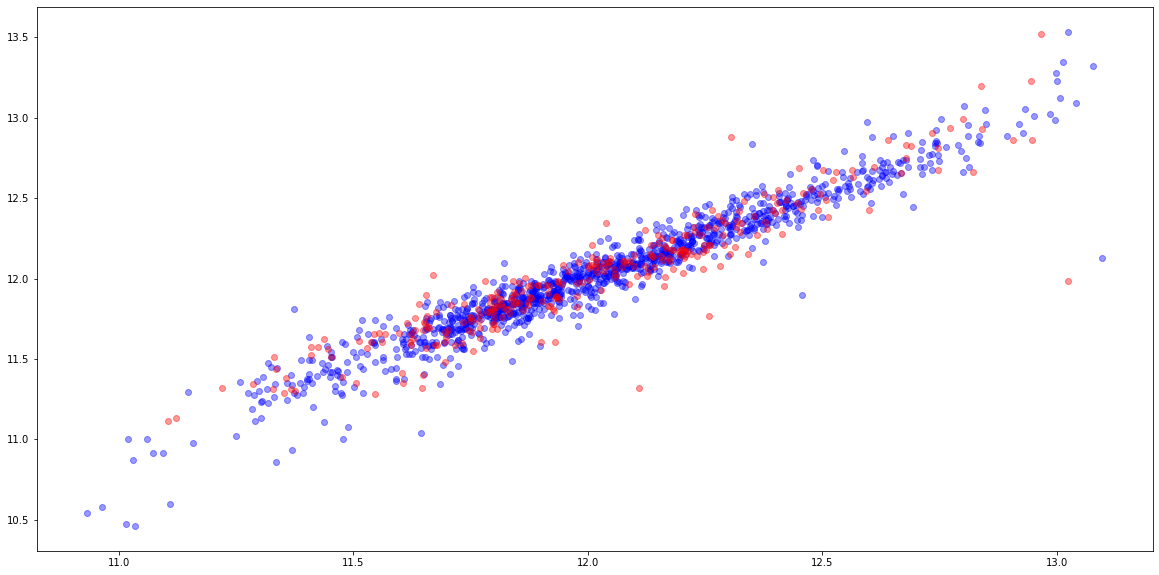

In [32]:
import time
t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)
print(current_time)

gbm = GradientBoostingRegressor(loss='ls', tol=1e-3, n_iter_no_change=10, validation_fraction=0.2)

learningrate = [0.045, 0.05, 0.055]
nestimators = [3500, 3750, 4000]
# np.linspace(1500, 2500, 9, dtype='int32')
subsamp = [0.6, 0.8, 1]

maxfeatures = range(9, 13)
maxdepth = range(4, 6)

warmstart = [True, False]

minsamlf = [8, 9, 10]
minsamsplt = [6, 7, 8]
minimpdec = [0.007, 0.01, 0.03]

gparam_gbm = {'learning_rate': learningrate,
              'n_estimators': nestimators, 
              'max_features': maxfeatures,
              'max_depth': maxdepth,
              'warm_start': warmstart,
              'min_samples_leaf': minsamlf,
              'min_samples_split': minsamsplt,
              'min_impurity_decrease': minimpdec,
              'subsample': subsamp
             }

n_folds=ms.KFold(n_splits=5, random_state=0, shuffle=True)

gs_gbm = GridSearchCV(gbm, gparam_gbm, cv=n_folds, refit=True, n_jobs=-1, 
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_gbm.fit(xtrain_gb, ytrain_gb)

print('#'*50)
print('\n')

print('Currently, the best parameters are: ', gs_gbm.best_params_)

print('where the learning rate is: ', gs_gbm.best_params_['learning_rate'])
print('and the number of estimators is: ', gs_gbm.best_params_['n_estimators'])
print('and the max features are: ', gs_gbm.best_params_['max_features'])
print('and the max depth is: ', gs_gbm.best_params_['max_depth'])
print('and warm start is: ', gs_gbm.best_params_['warm_start'])
print('and the min # of samples to split nodes are: ', gs_gbm.best_params_['min_samples_split'])
print('and the mnimum samples at a leaf node are: ', gs_gbm.best_params_['min_samples_leaf'])
print('and the minimum impurity decrease is: ', gs_gbm.best_params_['min_impurity_decrease'])

print('#'*50)
print('\n')

print('The best score is: ', gs_gbm.best_estimator_.score(xtrain_gb, ytrain_gb))

print('#'*50)
print('\n')

print('The RMSE is: ', rmse(gs_gbm, ytrain_gb, xtrain_gb))

print('#'*50)
print('\n')


print('The test set RMSE is: ', rmse(gs_gbm, ytest_gb, xtest_gb))
plt.figure(figsize=(20, 10))
plt.scatter(gs_gbm.best_estimator_.predict(xtrain_gb), ytrain_gb, color='blue', alpha=0.4)
plt.scatter(gs_gbm.best_estimator_.predict(xtest_gb), ytest_gb, color='red', alpha=0.4)

## Try Removing Outliers in the Data

In [33]:
xtrain_gb_out, xtest_gb_out, ytrain_gb_out, ytest_gb_out = ms.train_test_split(hp_tree_fullyimputed_noOutliers, 
                                                               hp_logsaleprice_noOutliers, test_size=0.2, random_state=0)

ytrain_gb_out = ytrain_gb_out.values.flatten()

Wall time: 14min 3s
##################################################


Currently, the best parameters are:  {'learning_rate': 0.01, 'max_depth': 3, 'max_features': 9, 'n_estimators': 5000}
where the alpha is:  0.01
and the L1 ratio is:  5000
where the alpha is:  9
and the L1 ratio is:  3
##################################################


The best score is:  0.98915920731198
##################################################


The RMSE is:  0.04127645566927299
##################################################


The test set RMSE is:  0.11427948873608253


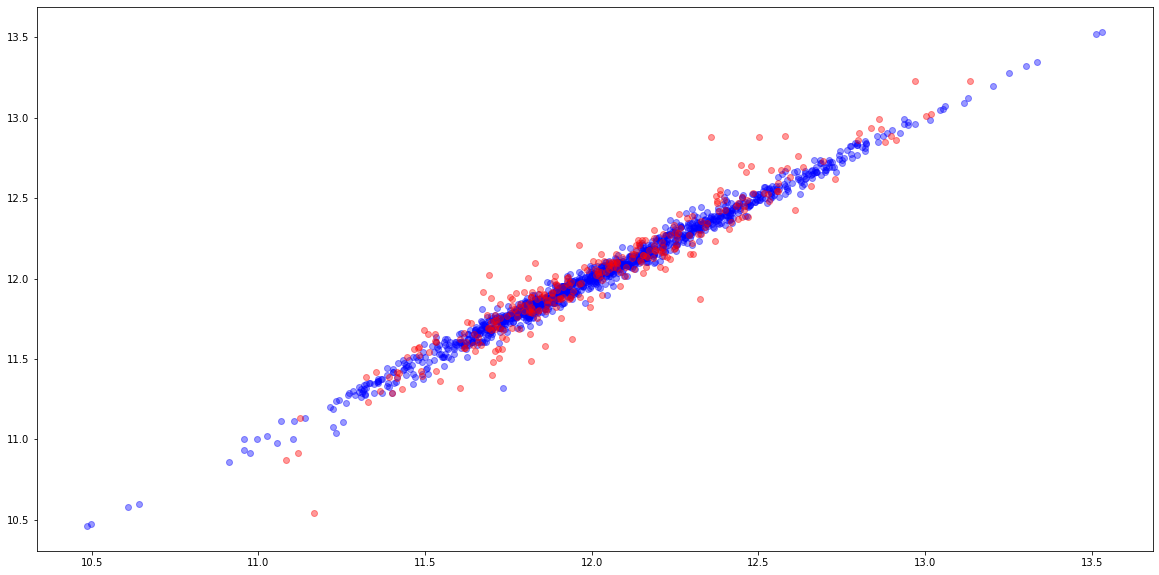

In [34]:
gbm = GradientBoostingRegressor(loss='ls')

learningrate = [0.0001, 0.001, 0.01, 0.1, 1] # subsequently, fine tune
nestimators = [5, 10, 50, 100, 200, 500, 1000, 1500, 2000, 5000]

maxfeatures = [9, 40, len(hp_tree_fullyimputed.columns)]
maxdepth = range(1, 5)

gparam_gbm = {'learning_rate': learningrate,
              'n_estimators': nestimators, 
              'max_features': maxfeatures,
              'max_depth': maxdepth}

n_folds=ms.KFold(n_splits=5, random_state=0, shuffle=True)

gs_gbm = GridSearchCV(gbm, gparam_gbm, cv=n_folds, refit=True, n_jobs=-1, 
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_gbm.fit(xtrain_gb_out, ytrain_gb_out)

print('#'*50)
print('\n')

print('Currently, the best parameters are: ', gs_gbm.best_params_)

print('where the alpha is: ', gs_gbm.best_params_['learning_rate'])
print('and the L1 ratio is: ', gs_gbm.best_params_['n_estimators'])
print('where the alpha is: ', gs_gbm.best_params_['max_features'])
print('and the L1 ratio is: ', gs_gbm.best_params_['max_depth'])

print('#'*50)
print('\n')

print('The best score is: ', gs_gbm.best_estimator_.score(xtrain_gb_out, ytrain_gb_out))

print('#'*50)
print('\n')

print('The RMSE is: ', rmse(gs_gbm, ytrain_gb_out, xtrain_gb_out))

print('#'*50)
print('\n')

print('The test set RMSE is: ', rmse(gs_gbm, ytest_gb_out, xtest_gb_out))

plt.figure(figsize=(20, 10))
plt.scatter(gs_gbm.best_estimator_.predict(xtrain_gb_out), ytrain_gb_out, color='blue', alpha=0.4)
plt.scatter(gs_gbm.best_estimator_.predict(xtest_gb_out), ytest_gb_out, color='red', alpha=0.4)

# RUN THIS CELL

19:25:30
Wall time: 1h 1min 8s
##################################################


Currently, the best parameters are:  {'learning_rate': 0.05, 'max_depth': 5, 'max_features': 11, 'min_impurity_decrease': 0.007, 'min_samples_leaf': 10, 'min_samples_split': 9, 'n_estimators': 2050, 'subsample': 0.6, 'warm_start': True}
where the learning rate is:  0.05
and the number of estimators is:  2050
and the max features are:  11
and the max depth is:  5
and warm start is:  True
and the min # of samples to split nodes are:  9
and the mnimum samples at a leaf node are:  10
and the minimum impurity decrease is:  0.007
##################################################


The best score is:  0.9284025090013371
##################################################


The RMSE is:  0.1060768904453398
##################################################


The test set RMSE is:  0.13413170948737094


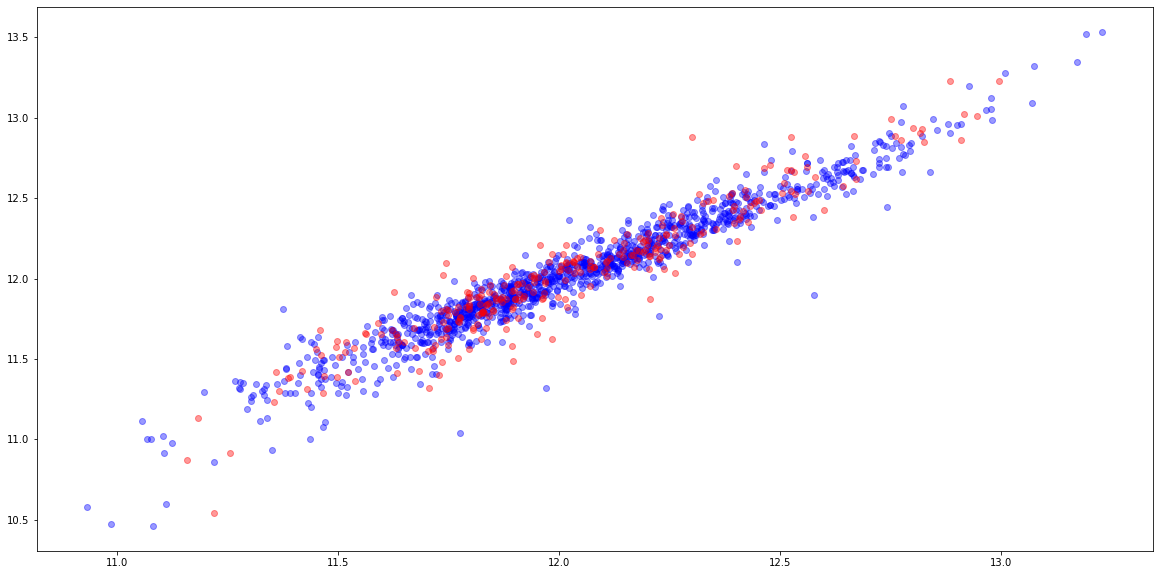

In [35]:
# {'learning_rate': 0.01, 'max_depth': 3, 'max_features': 9, 'n_estimators': 2000}

# {'learning_rate': 0.05, 'max_depth': 5, 'max_features': 10, 'min_impurity_decrease': 0.01,
#  'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 4000, 'subsample': 1, 'warm_start': False}

import time
t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)
print(current_time)

gbm = GradientBoostingRegressor(loss='ls', tol=1e-3, n_iter_no_change=10, validation_fraction=0.2)

learningrate = [0.005, 0.01, 0.05]
nestimators = [1950, 2000, 2050]

maxfeatures = range(7, 12)
maxdepth = range(2, 6)

warmstart = [True, False]

minsamlf = [9, 10, 11]
minsamsplt = [9, 10, 11]
minimpdec = [0.007, 0.01, 0.03]
subsamp = [0.6, 0.8, 1]

gparam_gbm = {'learning_rate': learningrate,
              'n_estimators': nestimators, 
              'max_features': maxfeatures,
              'max_depth': maxdepth,
              'warm_start': warmstart,
              'min_samples_leaf': minsamlf,
              'min_samples_split': minsamsplt,
              'min_impurity_decrease': minimpdec,
              'subsample': subsamp
             }

n_folds=ms.KFold(n_splits=5, random_state=0, shuffle=True)

gs_gbm = GridSearchCV(gbm, gparam_gbm, cv=n_folds, refit=True, n_jobs=-1, 
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_gbm.fit(xtrain_gb_out, ytrain_gb_out)

print('#'*50)
print('\n')

print('Currently, the best parameters are: ', gs_gbm.best_params_)

print('where the learning rate is: ', gs_gbm.best_params_['learning_rate'])
print('and the number of estimators is: ', gs_gbm.best_params_['n_estimators'])
print('and the max features are: ', gs_gbm.best_params_['max_features'])
print('and the max depth is: ', gs_gbm.best_params_['max_depth'])
print('and warm start is: ', gs_gbm.best_params_['warm_start'])
print('and the min # of samples to split nodes are: ', gs_gbm.best_params_['min_samples_split'])
print('and the mnimum samples at a leaf node are: ', gs_gbm.best_params_['min_samples_leaf'])
print('and the minimum impurity decrease is: ', gs_gbm.best_params_['min_impurity_decrease'])

print('#'*50)
print('\n')

print('The best score is: ', gs_gbm.best_estimator_.score(xtrain_gb_out, ytrain_gb_out))

print('#'*50)
print('\n')

print('The RMSE is: ', rmse(gs_gbm, ytrain_gb_out, xtrain_gb_out))

print('#'*50)
print('\n')


print('The test set RMSE is: ', rmse(gs_gbm, ytest_gb_out, xtest_gb_out))
plt.figure(figsize=(20, 10))
plt.scatter(gs_gbm.best_estimator_.predict(xtrain_gb_out), ytrain_gb_out, color='blue', alpha=0.4)
plt.scatter(gs_gbm.best_estimator_.predict(xtest_gb_out), ytest_gb_out, color='red', alpha=0.4)

### More Tuning

22:55:23
Wall time: 47min 29s
##################################################


Currently, the best parameters are:  {'learning_rate': 0.007, 'max_depth': 6, 'max_features': 11, 'min_impurity_decrease': 0.005, 'min_samples_leaf': 8, 'min_samples_split': 10, 'n_estimators': 2100, 'subsample': 0.8, 'warm_start': False}
where the learning rate is:  0.007
and the number of estimators is:  2100
and the max features are:  11
and the max depth is:  6
and warm start is:  False
and the min # of samples to split nodes are:  10
and the mnimum samples at a leaf node are:  8
and the minimum impurity decrease is:  0.005
##################################################


The best score is:  0.8859457881023236
##################################################


The RMSE is:  0.13388364959315674
##################################################


The test set RMSE is:  0.1588380804792091


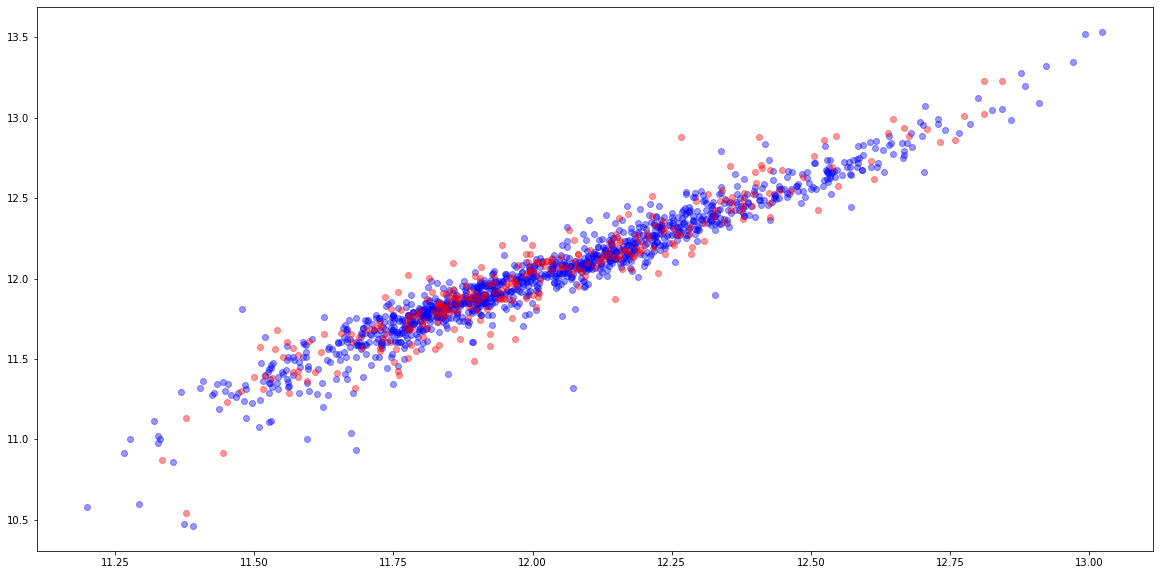

In [36]:
# {'learning_rate': 0.05, 'max_depth': 5, 'max_features': 11, 'min_impurity_decrease': 0.007,
#  'min_samples_leaf': 10, 'min_samples_split': 9, 'n_estimators': 2050, 'subsample': 0.6, 'warm_start': True}

import time
t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)
print(current_time)

gbm = GradientBoostingRegressor(loss='ls', tol=1e-3, n_iter_no_change=10, validation_fraction=0.2)

learningrate = [0.003, 0.005, 0.007]

maxdepth = [4, 5, 6]
maxfeatures = [10, 11, 12]

minimpdec = [0.005, 0.007, 0.01]
minsamlf = [8, 9, 10]
minsamsplt = [8, 9, 10]

nestimators = [2000, 2050, 2100]
subsamp = [0.4, 0.6, 0.8]

warmstart = [True, False]

gparam_gbm = {'learning_rate': learningrate,
              'max_depth': maxdepth,
              'max_features': maxfeatures,
              'min_impurity_decrease': minimpdec,
              'min_samples_leaf': minsamlf,
              'min_samples_split': minsamsplt,
              'n_estimators': nestimators,
              'subsample': subsamp,         
              'warm_start': warmstart
             }

n_folds=ms.KFold(n_splits=5, random_state=0, shuffle=True)

gs_gbm = GridSearchCV(gbm, gparam_gbm, cv=n_folds, refit=True, n_jobs=-1, 
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_gbm.fit(xtrain_gb_out, ytrain_gb_out)

print('#'*50)
print('\n')

print('Currently, the best parameters are: ', gs_gbm.best_params_)

print('where the learning rate is: ', gs_gbm.best_params_['learning_rate'])
print('and the number of estimators is: ', gs_gbm.best_params_['n_estimators'])
print('and the max features are: ', gs_gbm.best_params_['max_features'])
print('and the max depth is: ', gs_gbm.best_params_['max_depth'])
print('and warm start is: ', gs_gbm.best_params_['warm_start'])
print('and the min # of samples to split nodes are: ', gs_gbm.best_params_['min_samples_split'])
print('and the mnimum samples at a leaf node are: ', gs_gbm.best_params_['min_samples_leaf'])
print('and the minimum impurity decrease is: ', gs_gbm.best_params_['min_impurity_decrease'])

print('#'*50)
print('\n')

print('The best score is: ', gs_gbm.best_estimator_.score(xtrain_gb_out, ytrain_gb_out))

print('#'*50)
print('\n')

print('The RMSE is: ', rmse(gs_gbm, ytrain_gb_out, xtrain_gb_out))

print('#'*50)
print('\n')


print('The test set RMSE is: ', rmse(gs_gbm, ytest_gb_out, xtest_gb_out))
plt.figure(figsize=(20, 10))
plt.scatter(gs_gbm.best_estimator_.predict(xtrain_gb_out), ytrain_gb_out, color='blue', alpha=0.4)
plt.scatter(gs_gbm.best_estimator_.predict(xtest_gb_out), ytest_gb_out, color='red', alpha=0.4)

23:45:29
Wall time: 28min 2s
##################################################


Currently, the best parameters are:  {'learning_rate': 0.007, 'max_depth': 6, 'max_features': 11, 'min_impurity_decrease': 0.003, 'min_samples_leaf': 9, 'min_samples_split': 9, 'n_estimators': 2050, 'subsample': 1.0, 'warm_start': True}
where the learning rate is:  0.007
and the number of estimators is:  2050
and the max features are:  11
and the max depth is:  6
and warm start is:  True
and the min # of samples to split nodes are:  9
and the mnimum samples at a leaf node are:  9
and the minimum impurity decrease is:  0.003
##################################################


The best score is:  0.8887273845795061
##################################################


The RMSE is:  0.13224097011785393
##################################################


The test set RMSE is:  0.1650248487980615


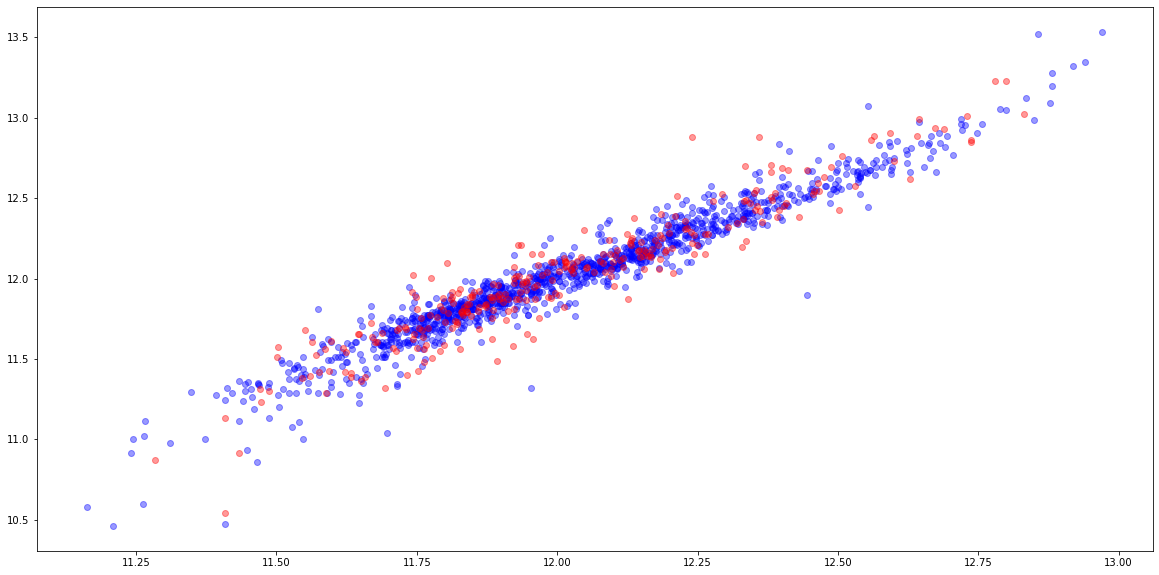

In [37]:
# {'learning_rate': 0.007, 'max_depth': 6, 'max_features': 11, 'min_impurity_decrease': 0.005, 
#  'min_samples_leaf': 8, 'min_samples_split': 10, 'n_estimators': 2100, 'subsample': 0.8, 'warm_start': False}

import time
t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)
print(current_time)

gbm = GradientBoostingRegressor(loss='ls', tol=1e-3, n_iter_no_change=10, validation_fraction=0.2)

learningrate = [0.003, 0.005, 0.007]

maxdepth = [5, 6, 7]
maxfeatures = [10, 11, 12]

minimpdec = [0.003, 0.005, 0.007]
minsamlf = [7, 8, 9]
minsamsplt = [9, 10, 11]

nestimators = [2050, 2100, 2150]
subsamp = [0.6, 0.8, 1.0]

warmstart = [True]

gparam_gbm = {'learning_rate': learningrate,
              'max_depth': maxdepth,
              'max_features': maxfeatures,
              'min_impurity_decrease': minimpdec,
              'min_samples_leaf': minsamlf,
              'min_samples_split': minsamsplt,
              'n_estimators': nestimators,
              'subsample': subsamp,         
              'warm_start': warmstart
             }

n_folds=ms.KFold(n_splits=5, random_state=0, shuffle=True)

gs_gbm = GridSearchCV(gbm, gparam_gbm, cv=n_folds, refit=True, n_jobs=-1, 
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_gbm.fit(xtrain_gb_out, ytrain_gb_out)

print('#'*50)
print('\n')

print('Currently, the best parameters are: ', gs_gbm.best_params_)

print('where the learning rate is: ', gs_gbm.best_params_['learning_rate'])
print('and the number of estimators is: ', gs_gbm.best_params_['n_estimators'])
print('and the max features are: ', gs_gbm.best_params_['max_features'])
print('and the max depth is: ', gs_gbm.best_params_['max_depth'])
print('and warm start is: ', gs_gbm.best_params_['warm_start'])
print('and the min # of samples to split nodes are: ', gs_gbm.best_params_['min_samples_split'])
print('and the mnimum samples at a leaf node are: ', gs_gbm.best_params_['min_samples_leaf'])
print('and the minimum impurity decrease is: ', gs_gbm.best_params_['min_impurity_decrease'])

print('#'*50)
print('\n')

print('The best score is: ', gs_gbm.best_estimator_.score(xtrain_gb_out, ytrain_gb_out))

print('#'*50)
print('\n')

print('The RMSE is: ', rmse(gs_gbm, ytrain_gb_out, xtrain_gb_out))

print('#'*50)
print('\n')


print('The test set RMSE is: ', rmse(gs_gbm, ytest_gb_out, xtest_gb_out))
plt.figure(figsize=(20, 10))
plt.scatter(gs_gbm.best_estimator_.predict(xtrain_gb_out), ytrain_gb_out, color='blue', alpha=0.4)
plt.scatter(gs_gbm.best_estimator_.predict(xtest_gb_out), ytest_gb_out, color='red', alpha=0.4)

15:56:20
Wall time: 11min 15s
##################################################


Currently, the best parameters are:  {'learning_rate': 0.007, 'max_depth': 7, 'max_features': 12, 'min_impurity_decrease': 0.003, 'min_samples_leaf': 10, 'min_samples_split': 7, 'n_estimators': 2075, 'subsample': 1.0, 'warm_start': True}
where the learning rate is:  0.007
and the number of estimators is:  2075
and the max features are:  12
and the max depth is:  7
and warm start is:  True
and the min # of samples to split nodes are:  7
and the mnimum samples at a leaf node are:  10
and the minimum impurity decrease is:  0.003
##################################################


The best score is:  0.8975498385415537
##################################################


The RMSE is:  0.1268902351162406
##################################################


The test set RMSE is:  0.1576183727459257


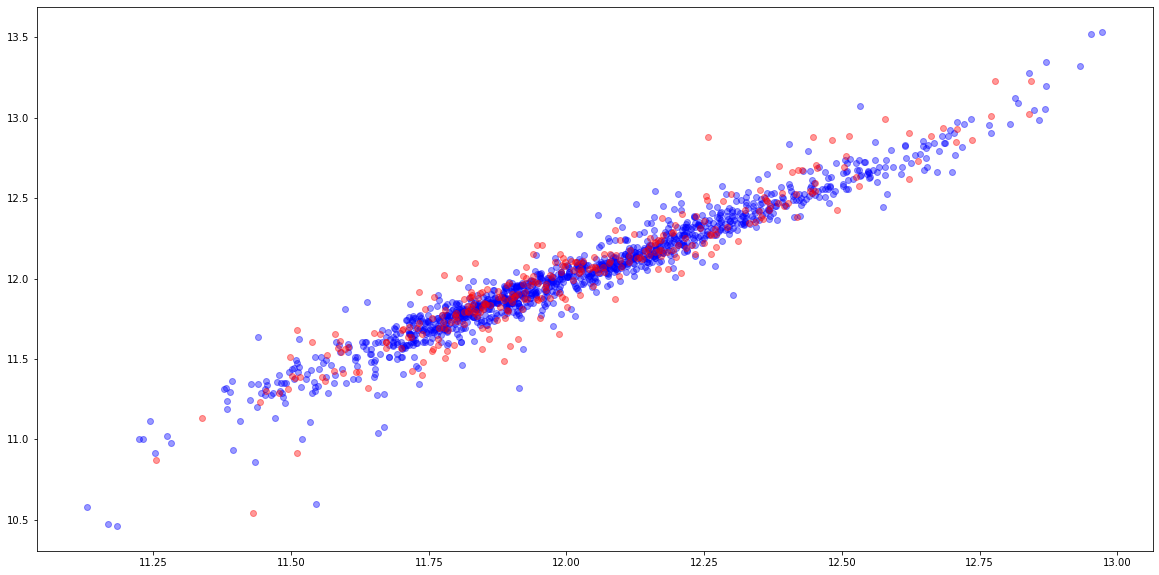

In [39]:
# {'learning_rate': 0.007, 'max_depth': 6, 'max_features': 11, 'min_impurity_decrease': 0.003,
#  'min_samples_leaf': 9, 'min_samples_split': 9, 'n_estimators': 2050, 'subsample': 1.0, 'warm_start': True}

import time
t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)
print(current_time)

gbm = GradientBoostingRegressor(loss='ls', tol=1e-3, n_iter_no_change=10, validation_fraction=0.2)

learningrate = [0.003, 0.005, 0.007]

maxdepth = [5, 6, 7]
maxfeatures = [10, 11, 12]

minimpdec = [0.002, 0.0025, 0.003]
minsamlf = [9, 10, 11]
minsamsplt = [7, 8, 9]

nestimators = [2025, 2050, 2075]
subsamp = [1.0, 1.25, 1.5]

warmstart = [True]

gparam_gbm = {'learning_rate': learningrate,
              'max_depth': maxdepth,
              'max_features': maxfeatures,
              'min_impurity_decrease': minimpdec,
              'min_samples_leaf': minsamlf,
              'min_samples_split': minsamsplt,
              'n_estimators': nestimators,
              'subsample': subsamp,         
              'warm_start': warmstart
             }

n_folds=ms.KFold(n_splits=5, random_state=0, shuffle=True)

gs_gbm = GridSearchCV(gbm, gparam_gbm, cv=n_folds, refit=True, n_jobs=-1, 
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_gbm.fit(xtrain_gb_out, ytrain_gb_out)

print('#'*50)
print('\n')

print('Currently, the best parameters are: ', gs_gbm.best_params_)

print('where the learning rate is: ', gs_gbm.best_params_['learning_rate'])
print('and the number of estimators is: ', gs_gbm.best_params_['n_estimators'])
print('and the max features are: ', gs_gbm.best_params_['max_features'])
print('and the max depth is: ', gs_gbm.best_params_['max_depth'])
print('and warm start is: ', gs_gbm.best_params_['warm_start'])
print('and the min # of samples to split nodes are: ', gs_gbm.best_params_['min_samples_split'])
print('and the mnimum samples at a leaf node are: ', gs_gbm.best_params_['min_samples_leaf'])
print('and the minimum impurity decrease is: ', gs_gbm.best_params_['min_impurity_decrease'])

print('#'*50)
print('\n')

print('The best score is: ', gs_gbm.best_estimator_.score(xtrain_gb_out, ytrain_gb_out))

print('#'*50)
print('\n')

print('The RMSE is: ', rmse(gs_gbm, ytrain_gb_out, xtrain_gb_out))

print('#'*50)
print('\n')


print('The test set RMSE is: ', rmse(gs_gbm, ytest_gb_out, xtest_gb_out))
plt.figure(figsize=(20, 10))
plt.scatter(gs_gbm.best_estimator_.predict(xtrain_gb_out), ytrain_gb_out, color='blue', alpha=0.4)
plt.scatter(gs_gbm.best_estimator_.predict(xtest_gb_out), ytest_gb_out, color='red', alpha=0.4)

16:33:09
Wall time: 8min 57s
##################################################


Currently, the best parameters are:  {'learning_rate': 0.008, 'max_depth': 7, 'max_features': 11, 'min_impurity_decrease': 0.003, 'min_samples_leaf': 11, 'min_samples_split': 7, 'n_estimators': 2050, 'subsample': 1.0, 'warm_start': True}
where the learning rate is:  0.008
and the number of estimators is:  2050
and the max features are:  11
and the max depth is:  7
and warm start is:  True
and the min # of samples to split nodes are:  7
and the mnimum samples at a leaf node are:  11
and the minimum impurity decrease is:  0.003
##################################################


The best score is:  0.8937422092840412
##################################################


The RMSE is:  0.1292267045744663
##################################################


The test set RMSE is:  0.15825006747877315


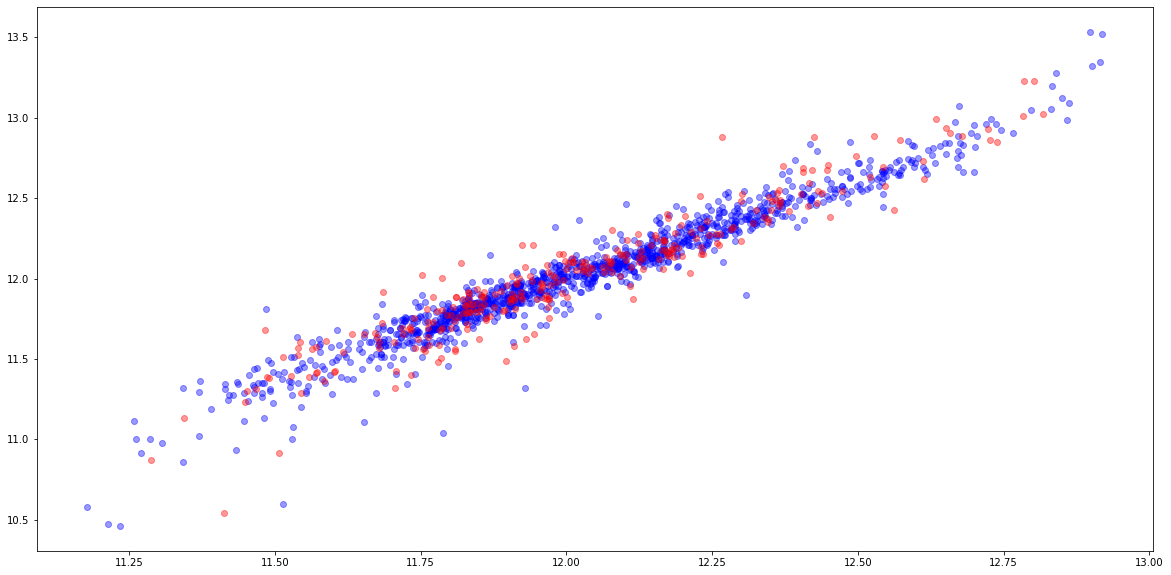

In [41]:
# {'learning_rate': 0.007, 'max_depth': 7, 'max_features': 12, 'min_impurity_decrease': 0.003,
#  'min_samples_leaf': 10, 'min_samples_split': 7, 'n_estimators': 2075, 'subsample': 1.0, 'warm_start': True}

import time
t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)
print(current_time)

gbm = GradientBoostingRegressor(loss='ls', tol=1e-3, n_iter_no_change=10, validation_fraction=0.2)

learningrate = [0.006, 0.007, 0.008]

maxdepth = [5, 6, 7]
maxfeatures = [10, 11, 12]

minimpdec = [0.002, 0.0025, 0.003]
minsamlf = [9, 10, 11]
minsamsplt = [7, 8, 9]

nestimators = [2025, 2050, 2075]
subsamp = [1.0, 1.25, 1.5]

warmstart = [True]

gparam_gbm = {'learning_rate': learningrate,
              'max_depth': maxdepth,
              'max_features': maxfeatures,
              'min_impurity_decrease': minimpdec,
              'min_samples_leaf': minsamlf,
              'min_samples_split': minsamsplt,
              'n_estimators': nestimators,
              'subsample': subsamp,         
              'warm_start': warmstart
             }

n_folds=ms.KFold(n_splits=5, random_state=0, shuffle=True)

gs_gbm = GridSearchCV(gbm, gparam_gbm, cv=n_folds, refit=True, n_jobs=-1, 
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_gbm.fit(xtrain_gb_out, ytrain_gb_out)

print('#'*50)
print('\n')

print('Currently, the best parameters are: ', gs_gbm.best_params_)

print('where the learning rate is: ', gs_gbm.best_params_['learning_rate'])
print('and the number of estimators is: ', gs_gbm.best_params_['n_estimators'])
print('and the max features are: ', gs_gbm.best_params_['max_features'])
print('and the max depth is: ', gs_gbm.best_params_['max_depth'])
print('and warm start is: ', gs_gbm.best_params_['warm_start'])
print('and the min # of samples to split nodes are: ', gs_gbm.best_params_['min_samples_split'])
print('and the mnimum samples at a leaf node are: ', gs_gbm.best_params_['min_samples_leaf'])
print('and the minimum impurity decrease is: ', gs_gbm.best_params_['min_impurity_decrease'])

print('#'*50)
print('\n')

print('The best score is: ', gs_gbm.best_estimator_.score(xtrain_gb_out, ytrain_gb_out))

print('#'*50)
print('\n')

print('The RMSE is: ', rmse(gs_gbm, ytrain_gb_out, xtrain_gb_out))

print('#'*50)
print('\n')


print('The test set RMSE is: ', rmse(gs_gbm, ytest_gb_out, xtest_gb_out))
plt.figure(figsize=(20, 10))
plt.scatter(gs_gbm.best_estimator_.predict(xtrain_gb_out), ytrain_gb_out, color='blue', alpha=0.4)
plt.scatter(gs_gbm.best_estimator_.predict(xtest_gb_out), ytest_gb_out, color='red', alpha=0.4)

16:52:47
Wall time: 7min 3s
##################################################


Currently, the best parameters are:  {'learning_rate': 0.012, 'max_depth': 6, 'max_features': 11, 'min_impurity_decrease': 0.0025, 'min_samples_leaf': 11, 'min_samples_split': 9, 'n_estimators': 2025, 'subsample': 1.0, 'warm_start': True}
##################################################


The best score is:  0.9109933157220336
##################################################


The RMSE is:  0.11827234014990963
##################################################


The test set RMSE is:  0.1472090943696777


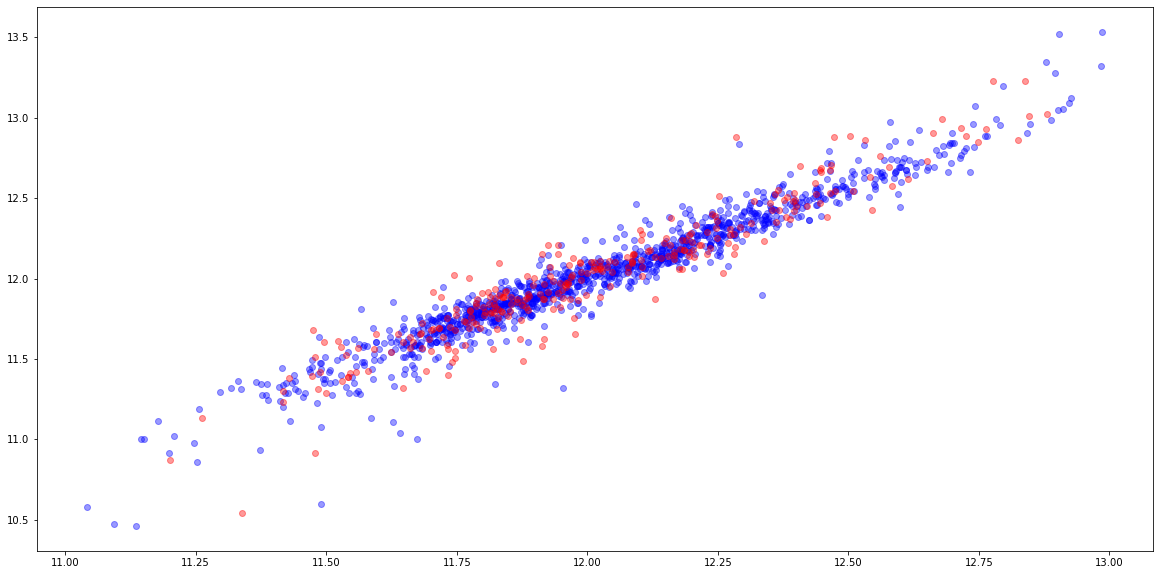

In [43]:
# {'learning_rate': 0.008, 'max_depth': 7, 'max_features': 11, 'min_impurity_decrease': 0.003,
#  'min_samples_leaf': 11, 'min_samples_split': 7, 'n_estimators': 2050, 'subsample': 1.0, 'warm_start': True}

import time
t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)
print(current_time)

gbm = GradientBoostingRegressor(loss='ls', tol=1e-3, n_iter_no_change=10, validation_fraction=0.2)

learningrate = [0.01, 0.011, 0.012]

maxdepth = [5, 6, 7]
maxfeatures = [10, 11, 12]

minimpdec = [0.002, 0.0025, 0.003]
minsamlf = [9, 10, 11]
minsamsplt = [7, 8, 9]

nestimators = [2025, 2050, 2075]
subsamp = [1.0, 1.25, 1.5]

warmstart = [True]

gparam_gbm = {'learning_rate': learningrate,
              'max_depth': maxdepth,
              'max_features': maxfeatures,
              'min_impurity_decrease': minimpdec,
              'min_samples_leaf': minsamlf,
              'min_samples_split': minsamsplt,
              'n_estimators': nestimators,
              'subsample': subsamp,         
              'warm_start': warmstart
             }

n_folds=ms.KFold(n_splits=5, random_state=0, shuffle=True)

gs_gbm = GridSearchCV(gbm, gparam_gbm, cv=n_folds, refit=True, n_jobs=-1, 
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_gbm.fit(xtrain_gb_out, ytrain_gb_out)

print('#'*50)
print('\n')

print('Currently, the best parameters are: ', gs_gbm.best_params_)

print('#'*50)
print('\n')

print('The best score is: ', gs_gbm.best_estimator_.score(xtrain_gb_out, ytrain_gb_out))

print('#'*50)
print('\n')

print('The RMSE is: ', rmse(gs_gbm, ytrain_gb_out, xtrain_gb_out))

print('#'*50)
print('\n')


print('The test set RMSE is: ', rmse(gs_gbm, ytest_gb_out, xtest_gb_out))
plt.figure(figsize=(20, 10))
plt.scatter(gs_gbm.best_estimator_.predict(xtrain_gb_out), ytrain_gb_out, color='blue', alpha=0.4)
plt.scatter(gs_gbm.best_estimator_.predict(xtest_gb_out), ytest_gb_out, color='red', alpha=0.4)

17:00:44
Wall time: 3min 25s
##################################################


Currently, the best parameters are:  {'learning_rate': 0.14, 'max_depth': 7, 'max_features': 11, 'min_impurity_decrease': 0.003, 'min_samples_leaf': 10, 'min_samples_split': 7, 'n_estimators': 2075, 'subsample': 1.0, 'warm_start': True}
##################################################


The best score is:  0.9570977016642216
##################################################


The RMSE is:  0.08211304507720764
##################################################


The test set RMSE is:  0.13093840903494702


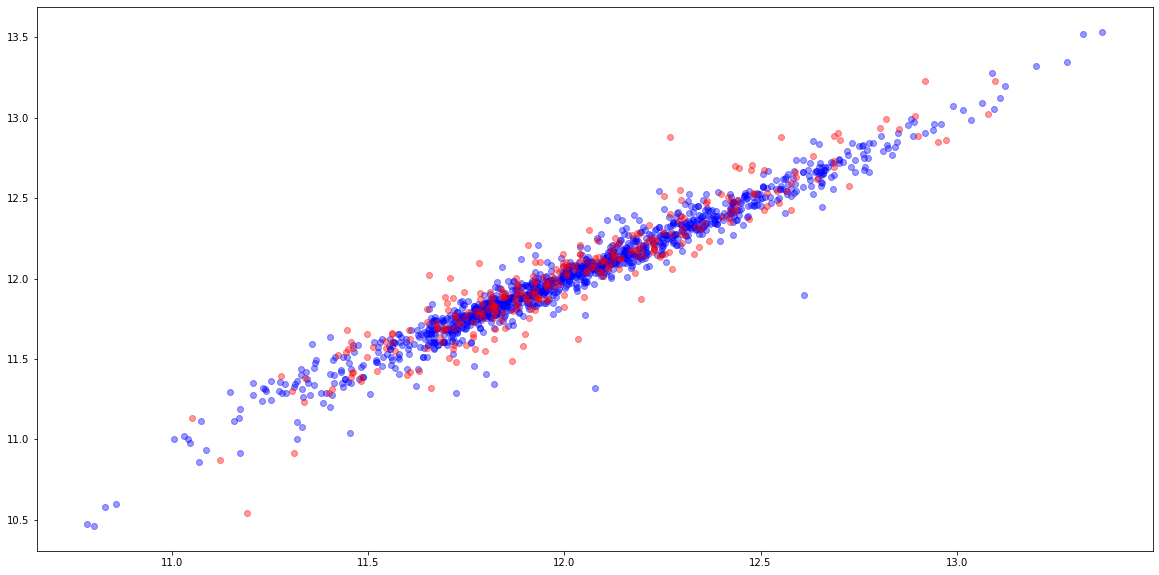

In [44]:
# {'learning_rate': 0.012, 'max_depth': 6, 'max_features': 11, 'min_impurity_decrease': 0.0025,
#  'min_samples_leaf': 11, 'min_samples_split': 9, 'n_estimators': 2025, 'subsample': 1.0, 'warm_start': True}

import time
t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)
print(current_time)

gbm = GradientBoostingRegressor(loss='ls', tol=1e-3, n_iter_no_change=10, validation_fraction=0.2)

learningrate = [0.012, 0.13, 0.14]

maxdepth = [5, 6, 7]
maxfeatures = [10, 11, 12]

minimpdec = [0.002, 0.0025, 0.003]
minsamlf = [9, 10, 11]
minsamsplt = [7, 8, 9]

nestimators = [2025, 2050, 2075]
subsamp = [1.0, 1.25, 1.5]

warmstart = [True]

gparam_gbm = {'learning_rate': learningrate,
              'max_depth': maxdepth,
              'max_features': maxfeatures,
              'min_impurity_decrease': minimpdec,
              'min_samples_leaf': minsamlf,
              'min_samples_split': minsamsplt,
              'n_estimators': nestimators,
              'subsample': subsamp,         
              'warm_start': warmstart
             }

n_folds=ms.KFold(n_splits=5, random_state=0, shuffle=True)

gs_gbm = GridSearchCV(gbm, gparam_gbm, cv=n_folds, refit=True, n_jobs=-1, 
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_gbm.fit(xtrain_gb_out, ytrain_gb_out)

print('#'*50)
print('\n')

print('Currently, the best parameters are: ', gs_gbm.best_params_)

print('#'*50)
print('\n')

print('The best score is: ', gs_gbm.best_estimator_.score(xtrain_gb_out, ytrain_gb_out))

print('#'*50)
print('\n')

print('The RMSE is: ', rmse(gs_gbm, ytrain_gb_out, xtrain_gb_out))

print('#'*50)
print('\n')


print('The test set RMSE is: ', rmse(gs_gbm, ytest_gb_out, xtest_gb_out))
plt.figure(figsize=(20, 10))
plt.scatter(gs_gbm.best_estimator_.predict(xtrain_gb_out), ytrain_gb_out, color='blue', alpha=0.4)
plt.scatter(gs_gbm.best_estimator_.predict(xtest_gb_out), ytest_gb_out, color='red', alpha=0.4)

17:09:04
Wall time: 1min 44s
##################################################


Currently, the best parameters are:  {'learning_rate': 0.15, 'max_depth': 6, 'max_features': 12, 'min_impurity_decrease': 0.0025, 'min_samples_leaf': 11, 'min_samples_split': 7, 'n_estimators': 2025, 'subsample': 1.0, 'warm_start': True}
##################################################


The best score is:  0.9544385903500886
##################################################


The RMSE is:  0.08461949998264633
##################################################


The test set RMSE is:  0.1331328437190189


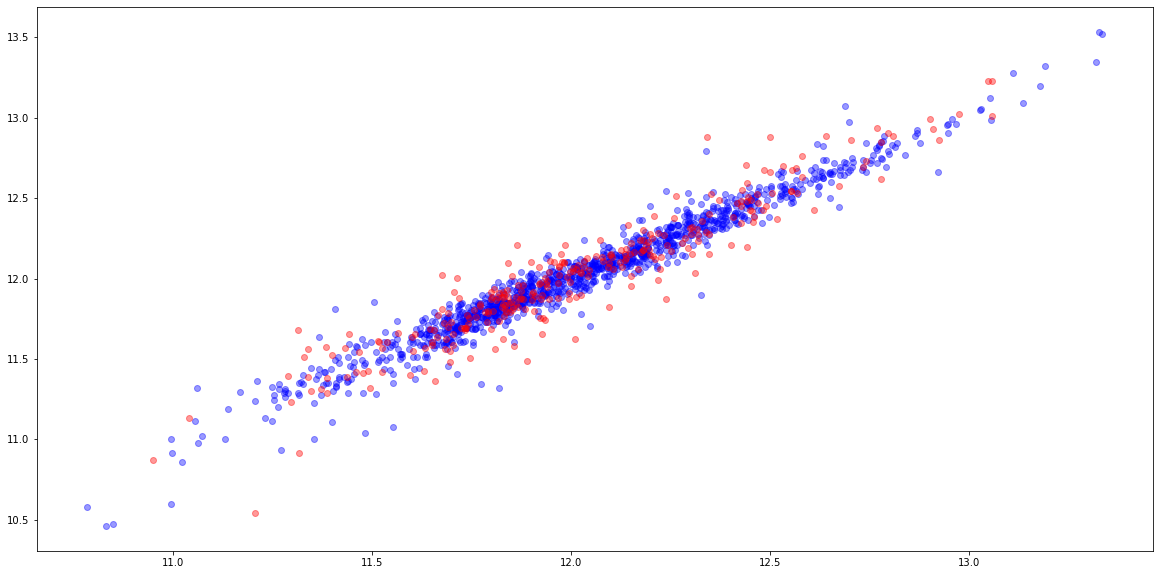

In [45]:
# {'learning_rate': 0.14, 'max_depth': 7, 'max_features': 11, 'min_impurity_decrease': 0.003,
#  'min_samples_leaf': 10, 'min_samples_split': 7, 'n_estimators': 2075, 'subsample': 1.0, 'warm_start': True}

import time
t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)
print(current_time)

gbm = GradientBoostingRegressor(loss='ls', tol=1e-3, n_iter_no_change=10, validation_fraction=0.2)

learningrate = [0.14, 0.15, 0.16]

maxdepth = [5, 6, 7]
maxfeatures = [10, 11, 12]

minimpdec = [0.002, 0.0025, 0.003]
minsamlf = [9, 10, 11]
minsamsplt = [7, 8, 9]

nestimators = [2025, 2050, 2075]
subsamp = [1.0, 1.25, 1.5]

warmstart = [True]

gparam_gbm = {'learning_rate': learningrate,
              'max_depth': maxdepth,
              'max_features': maxfeatures,
              'min_impurity_decrease': minimpdec,
              'min_samples_leaf': minsamlf,
              'min_samples_split': minsamsplt,
              'n_estimators': nestimators,
              'subsample': subsamp,         
              'warm_start': warmstart
             }

n_folds=ms.KFold(n_splits=5, random_state=0, shuffle=True)

gs_gbm = GridSearchCV(gbm, gparam_gbm, cv=n_folds, refit=True, n_jobs=-1, 
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_gbm.fit(xtrain_gb_out, ytrain_gb_out)

print('#'*50)
print('\n')

print('Currently, the best parameters are: ', gs_gbm.best_params_)

print('#'*50)
print('\n')

print('The best score is: ', gs_gbm.best_estimator_.score(xtrain_gb_out, ytrain_gb_out))

print('#'*50)
print('\n')

print('The RMSE is: ', rmse(gs_gbm, ytrain_gb_out, xtrain_gb_out))

print('#'*50)
print('\n')


print('The test set RMSE is: ', rmse(gs_gbm, ytest_gb_out, xtest_gb_out))
plt.figure(figsize=(20, 10))
plt.scatter(gs_gbm.best_estimator_.predict(xtrain_gb_out), ytrain_gb_out, color='blue', alpha=0.4)
plt.scatter(gs_gbm.best_estimator_.predict(xtest_gb_out), ytest_gb_out, color='red', alpha=0.4)

17:11:25
Wall time: 1min 43s
##################################################


Currently, the best parameters are:  {'learning_rate': 0.155, 'max_depth': 5, 'max_features': 12, 'min_impurity_decrease': 0.003, 'min_samples_leaf': 11, 'min_samples_split': 8, 'n_estimators': 2050, 'subsample': 1.0, 'warm_start': True}
##################################################


The best score is:  0.9432031391983366
##################################################


The RMSE is:  0.09447872957520924
##################################################


The test set RMSE is:  0.13226910789842863


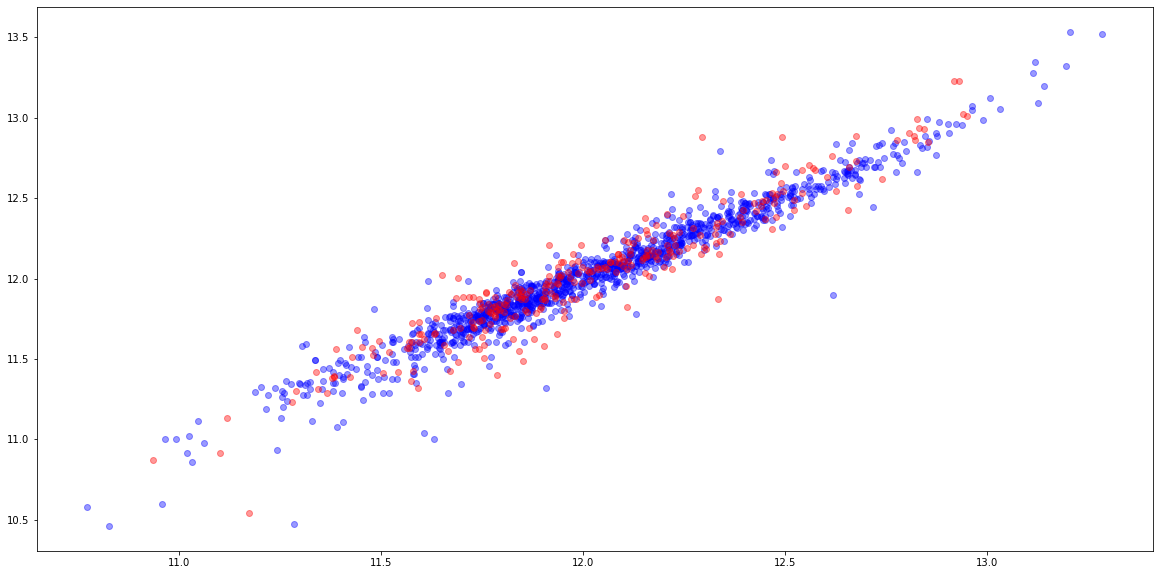

In [46]:
import time
t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)
print(current_time)

gbm = GradientBoostingRegressor(loss='ls', tol=1e-3, n_iter_no_change=10, validation_fraction=0.2)

learningrate = [0.145, 0.15, 0.155]

maxdepth = [5, 6, 7]
maxfeatures = [10, 11, 12]

minimpdec = [0.002, 0.0025, 0.003]
minsamlf = [9, 10, 11]
minsamsplt = [7, 8, 9]

nestimators = [2025, 2050, 2075]
subsamp = [1.0, 1.25, 1.5]

warmstart = [True]

gparam_gbm = {'learning_rate': learningrate,
              'max_depth': maxdepth,
              'max_features': maxfeatures,
              'min_impurity_decrease': minimpdec,
              'min_samples_leaf': minsamlf,
              'min_samples_split': minsamsplt,
              'n_estimators': nestimators,
              'subsample': subsamp,         
              'warm_start': warmstart
             }

n_folds=ms.KFold(n_splits=5, random_state=0, shuffle=True)

gs_gbm = GridSearchCV(gbm, gparam_gbm, cv=n_folds, refit=True, n_jobs=-1, 
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_gbm.fit(xtrain_gb_out, ytrain_gb_out)

print('#'*50)
print('\n')

print('Currently, the best parameters are: ', gs_gbm.best_params_)

print('#'*50)
print('\n')

print('The best score is: ', gs_gbm.best_estimator_.score(xtrain_gb_out, ytrain_gb_out))

print('#'*50)
print('\n')

print('The RMSE is: ', rmse(gs_gbm, ytrain_gb_out, xtrain_gb_out))

print('#'*50)
print('\n')


print('The test set RMSE is: ', rmse(gs_gbm, ytest_gb_out, xtest_gb_out))
plt.figure(figsize=(20, 10))
plt.scatter(gs_gbm.best_estimator_.predict(xtrain_gb_out), ytrain_gb_out, color='blue', alpha=0.4)
plt.scatter(gs_gbm.best_estimator_.predict(xtest_gb_out), ytest_gb_out, color='red', alpha=0.4)

17:14:02
Wall time: 1min 46s
##################################################


Currently, the best parameters are:  {'learning_rate': 0.1575, 'max_depth': 7, 'max_features': 10, 'min_impurity_decrease': 0.002, 'min_samples_leaf': 11, 'min_samples_split': 9, 'n_estimators': 2075, 'subsample': 1.0, 'warm_start': True}
##################################################


The best score is:  0.9544091222472834
##################################################


The RMSE is:  0.08464686056122546
##################################################


The test set RMSE is:  0.13092330081465645


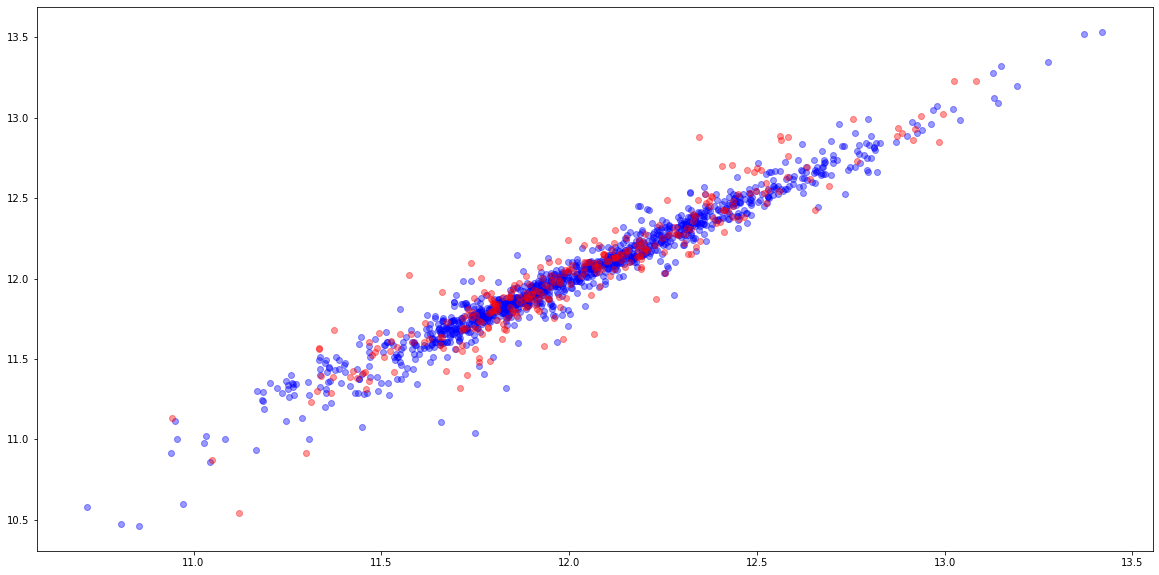

In [47]:
import time
t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)
print(current_time)

gbm = GradientBoostingRegressor(loss='ls', tol=1e-3, n_iter_no_change=10, validation_fraction=0.2)

learningrate = [0.1525, 0.155, 0.1575]

maxdepth = [5, 6, 7]
maxfeatures = [10, 11, 12]

minimpdec = [0.002, 0.0025, 0.003]
minsamlf = [9, 10, 11]
minsamsplt = [7, 8, 9]

nestimators = [2025, 2050, 2075]
subsamp = [1.0, 1.25, 1.5]

warmstart = [True]

gparam_gbm = {'learning_rate': learningrate,
              'max_depth': maxdepth,
              'max_features': maxfeatures,
              'min_impurity_decrease': minimpdec,
              'min_samples_leaf': minsamlf,
              'min_samples_split': minsamsplt,
              'n_estimators': nestimators,
              'subsample': subsamp,         
              'warm_start': warmstart
             }

n_folds=ms.KFold(n_splits=5, random_state=0, shuffle=True)

gs_gbm = GridSearchCV(gbm, gparam_gbm, cv=n_folds, refit=True, n_jobs=-1, 
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_gbm.fit(xtrain_gb_out, ytrain_gb_out)

print('#'*50)
print('\n')

print('Currently, the best parameters are: ', gs_gbm.best_params_)

print('#'*50)
print('\n')

print('The best score is: ', gs_gbm.best_estimator_.score(xtrain_gb_out, ytrain_gb_out))

print('#'*50)
print('\n')

print('The RMSE is: ', rmse(gs_gbm, ytrain_gb_out, xtrain_gb_out))

print('#'*50)
print('\n')


print('The test set RMSE is: ', rmse(gs_gbm, ytest_gb_out, xtest_gb_out))
plt.figure(figsize=(20, 10))
plt.scatter(gs_gbm.best_estimator_.predict(xtrain_gb_out), ytrain_gb_out, color='blue', alpha=0.4)
plt.scatter(gs_gbm.best_estimator_.predict(xtest_gb_out), ytest_gb_out, color='red', alpha=0.4)

17:17:15
Wall time: 2min 16s
##################################################


Currently, the best parameters are:  {'learning_rate': 0.155, 'max_depth': 5, 'max_features': 11, 'min_impurity_decrease': 0.003, 'min_samples_leaf': 9, 'min_samples_split': 8, 'n_estimators': 2025, 'subsample': 1.0, 'warm_start': True}
##################################################


The best score is:  0.948377817792983
##################################################


The RMSE is:  0.0900720522790941
##################################################


The test set RMSE is:  0.1326521219694285


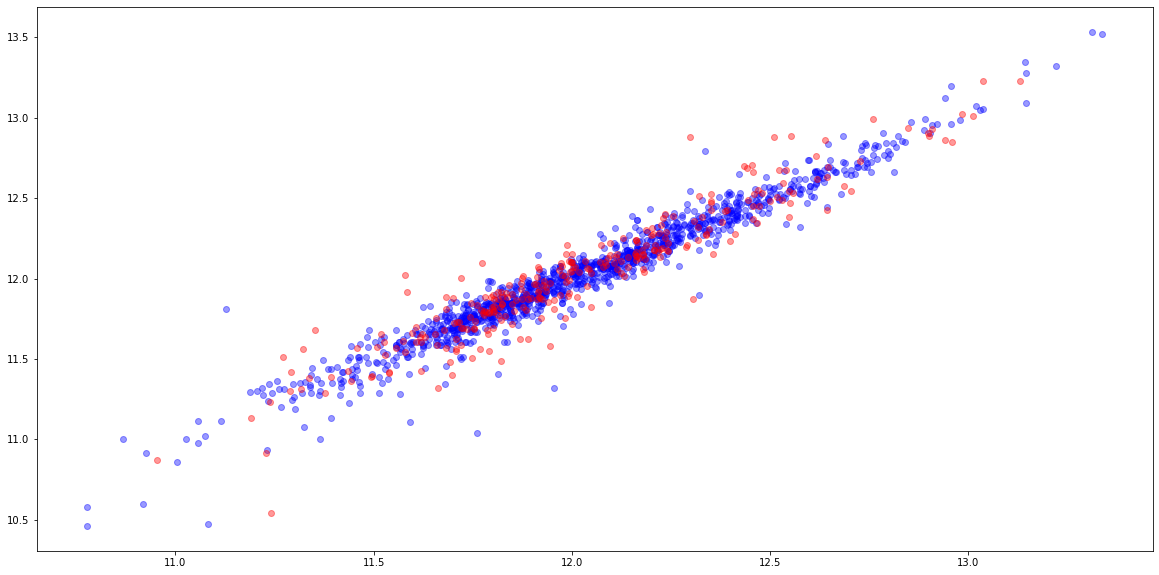

In [48]:
import time
t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)
print(current_time)

gbm = GradientBoostingRegressor(loss='ls', tol=1e-3, n_iter_no_change=10, validation_fraction=0.2)

learningrate = [0.155, 0.1575, 0.159, 0.16]

maxdepth = [5, 6, 7]
maxfeatures = [10, 11, 12]

minimpdec = [0.002, 0.0025, 0.003]
minsamlf = [9, 10, 11]
minsamsplt = [7, 8, 9]

nestimators = [2025, 2050, 2075]
subsamp = [1.0, 1.25, 1.5]

warmstart = [True]

gparam_gbm = {'learning_rate': learningrate,
              'max_depth': maxdepth,
              'max_features': maxfeatures,
              'min_impurity_decrease': minimpdec,
              'min_samples_leaf': minsamlf,
              'min_samples_split': minsamsplt,
              'n_estimators': nestimators,
              'subsample': subsamp,         
              'warm_start': warmstart
             }

n_folds=ms.KFold(n_splits=5, random_state=0, shuffle=True)

gs_gbm = GridSearchCV(gbm, gparam_gbm, cv=n_folds, refit=True, n_jobs=-1, 
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_gbm.fit(xtrain_gb_out, ytrain_gb_out)

print('#'*50)
print('\n')

print('Currently, the best parameters are: ', gs_gbm.best_params_)

print('#'*50)
print('\n')

print('The best score is: ', gs_gbm.best_estimator_.score(xtrain_gb_out, ytrain_gb_out))

print('#'*50)
print('\n')

print('The RMSE is: ', rmse(gs_gbm, ytrain_gb_out, xtrain_gb_out))

print('#'*50)
print('\n')


print('The test set RMSE is: ', rmse(gs_gbm, ytest_gb_out, xtest_gb_out))
plt.figure(figsize=(20, 10))
plt.scatter(gs_gbm.best_estimator_.predict(xtrain_gb_out), ytrain_gb_out, color='blue', alpha=0.4)
plt.scatter(gs_gbm.best_estimator_.predict(xtest_gb_out), ytest_gb_out, color='red', alpha=0.4)

17:23:34
Wall time: 3min 27s
##################################################


Currently, the best parameters are:  {'learning_rate': 0.157, 'max_depth': 5, 'max_features': 11, 'min_impurity_decrease': 0.002, 'min_samples_leaf': 11, 'min_samples_split': 8, 'n_estimators': 2025, 'subsample': 1.0, 'warm_start': True}
##################################################


The best score is:  0.9455610573237692
##################################################


The RMSE is:  0.09249680236380721
##################################################


The test set RMSE is:  0.13734167983693654


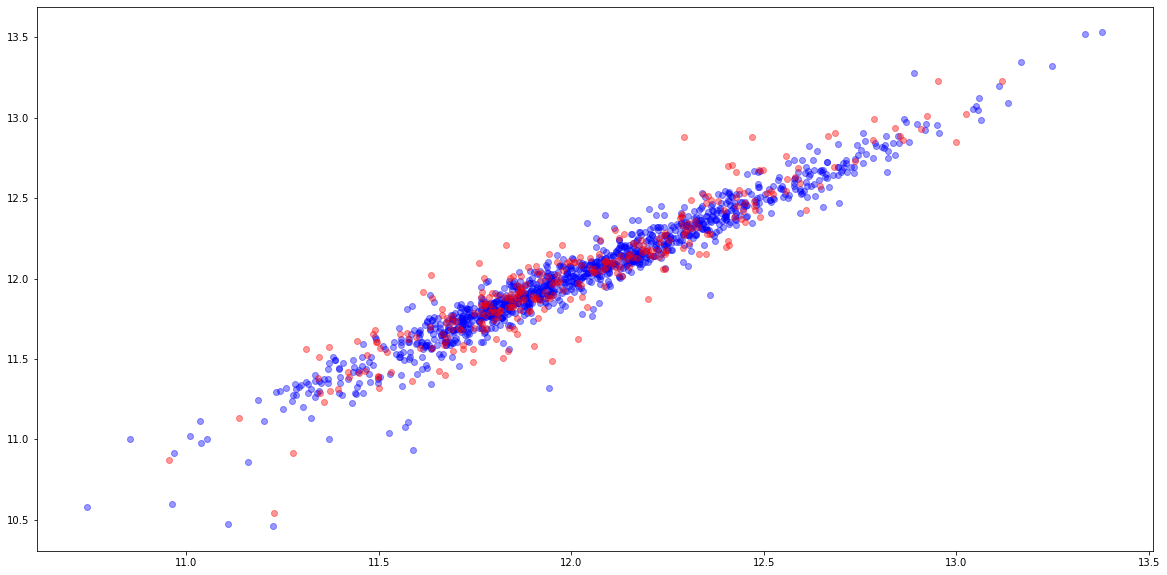

In [50]:
import time
t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)
print(current_time)

gbm = GradientBoostingRegressor(loss='ls', tol=1e-3, n_iter_no_change=10, validation_fraction=0.2)

learningrate = [0.155, 0.1555, 0.156, 0.1565, 0.157, 0.1575]

maxdepth = [5, 6, 7]
maxfeatures = [10, 11, 12]

minimpdec = [0.002, 0.0025, 0.003]
minsamlf = [9, 10, 11]
minsamsplt = [7, 8, 9]

nestimators = [2025, 2050, 2075]
subsamp = [1.0, 1.25, 1.5]

warmstart = [True]

gparam_gbm = {'learning_rate': learningrate,
              'max_depth': maxdepth,
              'max_features': maxfeatures,
              'min_impurity_decrease': minimpdec,
              'min_samples_leaf': minsamlf,
              'min_samples_split': minsamsplt,
              'n_estimators': nestimators,
              'subsample': subsamp,         
              'warm_start': warmstart
             }

n_folds=ms.KFold(n_splits=5, random_state=0, shuffle=True)

gs_gbm = GridSearchCV(gbm, gparam_gbm, cv=n_folds, refit=True, n_jobs=-1, 
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_gbm.fit(xtrain_gb_out, ytrain_gb_out)

print('#'*50)
print('\n')

print('Currently, the best parameters are: ', gs_gbm.best_params_)

print('#'*50)
print('\n')

print('The best score is: ', gs_gbm.best_estimator_.score(xtrain_gb_out, ytrain_gb_out))

print('#'*50)
print('\n')

print('The RMSE is: ', rmse(gs_gbm, ytrain_gb_out, xtrain_gb_out))

print('#'*50)
print('\n')


print('The test set RMSE is: ', rmse(gs_gbm, ytest_gb_out, xtest_gb_out))
plt.figure(figsize=(20, 10))
plt.scatter(gs_gbm.best_estimator_.predict(xtrain_gb_out), ytrain_gb_out, color='blue', alpha=0.4)
plt.scatter(gs_gbm.best_estimator_.predict(xtest_gb_out), ytest_gb_out, color='red', alpha=0.4)

17:35:41
Wall time: 1min 43s
##################################################


Currently, the best parameters are:  {'learning_rate': 0.1573, 'max_depth': 6, 'max_features': 12, 'min_impurity_decrease': 0.002, 'min_samples_leaf': 10, 'min_samples_split': 8, 'n_estimators': 2050, 'subsample': 1.0, 'warm_start': True}
##################################################


The best score is:  0.9549542122861185
##################################################


The RMSE is:  0.08413931488764652
##################################################


The test set RMSE is:  0.13091285826879007


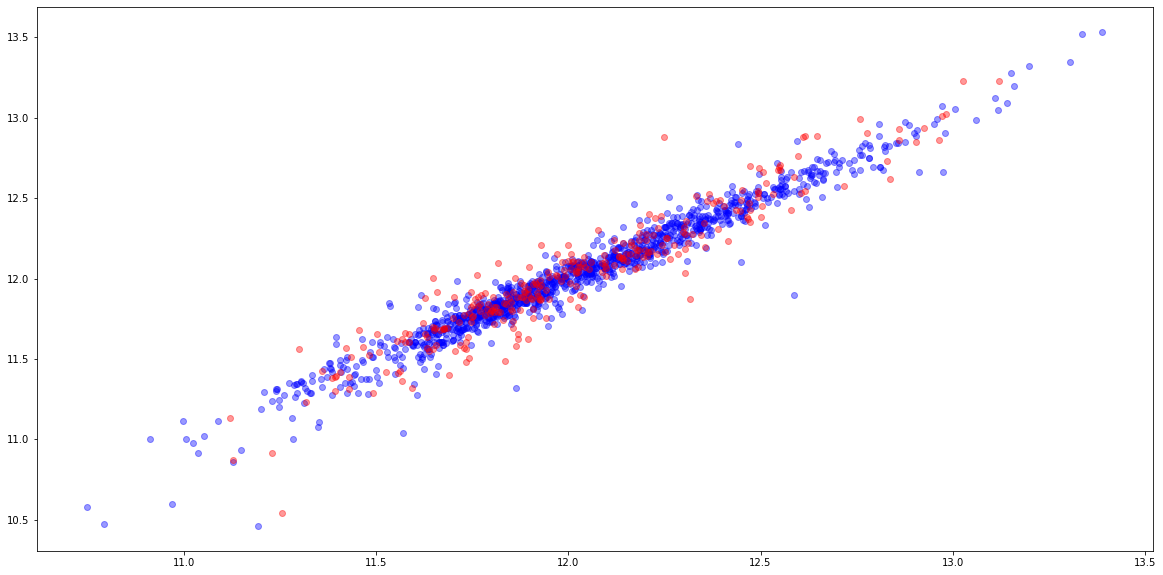

In [53]:
import time
t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)
print(current_time)

gbm = GradientBoostingRegressor(loss='ls', tol=1e-3, n_iter_no_change=10, validation_fraction=0.2)

learningrate = [0.15729, 0.1573, 0.15731]

maxdepth = [5, 6, 7]
maxfeatures = [10, 11, 12]

minimpdec = [0.002, 0.0025, 0.003]
minsamlf = [9, 10, 11]
minsamsplt = [7, 8, 9]

nestimators = [2025, 2050, 2075]
subsamp = [1.0, 1.25, 1.5]

warmstart = [True]

gparam_gbm = {'learning_rate': learningrate,
              'max_depth': maxdepth,
              'max_features': maxfeatures,
              'min_impurity_decrease': minimpdec,
              'min_samples_leaf': minsamlf,
              'min_samples_split': minsamsplt,
              'n_estimators': nestimators,
              'subsample': subsamp,         
              'warm_start': warmstart
             }

n_folds=ms.KFold(n_splits=5, random_state=0, shuffle=True)

gs_gbm = GridSearchCV(gbm, gparam_gbm, cv=n_folds, refit=True, n_jobs=-1, 
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_gbm.fit(xtrain_gb_out, ytrain_gb_out)

print('#'*50)
print('\n')

print('Currently, the best parameters are: ', gs_gbm.best_params_)

print('#'*50)
print('\n')

print('The best score is: ', gs_gbm.best_estimator_.score(xtrain_gb_out, ytrain_gb_out))

print('#'*50)
print('\n')

print('The RMSE is: ', rmse( gs_gbm, ytrain_gb_out, xtrain_gb_out))

print('#'*50)
print('\n')


print('The test set RMSE is: ', rmse(gs_gbm, ytest_gb_out, xtest_gb_out))
plt.figure(figsize=(20, 10))
plt.scatter(gs_gbm.best_estimator_.predict(xtrain_gb_out), ytrain_gb_out, color='blue', alpha=0.4)
plt.scatter(gs_gbm.best_estimator_.predict(xtest_gb_out), ytest_gb_out, color='red', alpha=0.4)

17:40:26
Wall time: 1.92 s
##################################################


Currently, the best parameters are:  {'learning_rate': 0.1573, 'max_depth': 6, 'max_features': 14, 'min_impurity_decrease': 0.0022, 'min_samples_leaf': 10, 'min_samples_split': 8, 'n_estimators': 2040, 'subsample': 1.0, 'warm_start': True}
##################################################


The best score is:  0.9593776734038629
##################################################


The RMSE is:  0.07990137908833522
##################################################


The test set RMSE is:  0.1267427414200034


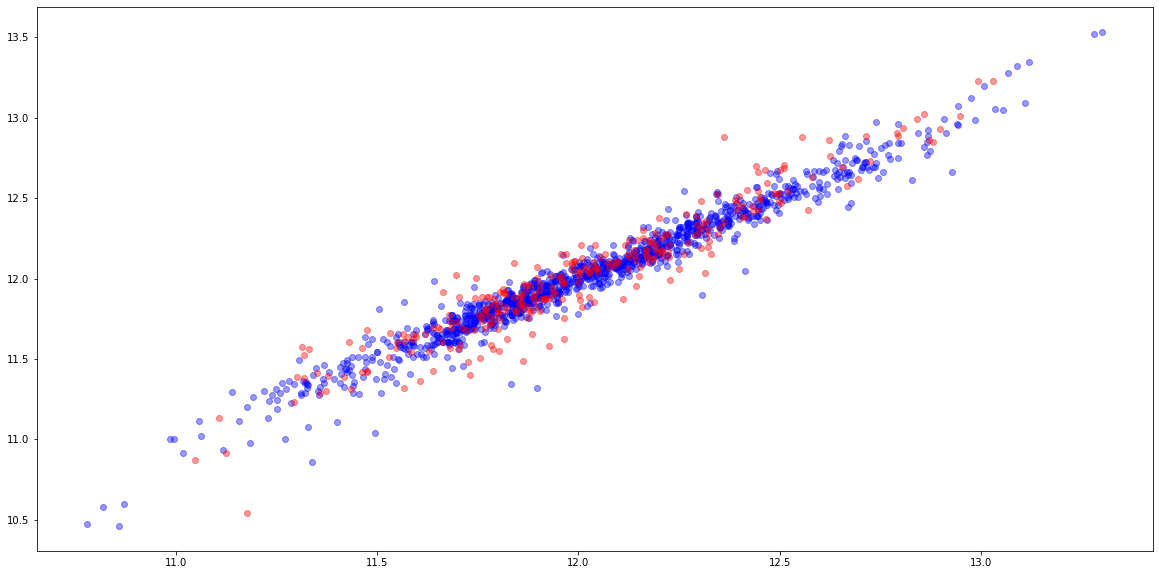

In [55]:
# {'learning_rate': 0.1573, 'max_depth': 6, 'max_features': 12, 'min_impurity_decrease': 0.002,
#  'min_samples_leaf': 10, 'min_samples_split': 8, 'n_estimators': 2050, 'subsample': 1.0, 'warm_start': True}

import time
t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)
print(current_time)

gbm = GradientBoostingRegressor(loss='ls', tol=1e-3, n_iter_no_change=10, validation_fraction=0.2)

learningrate = [0.1573]

maxdepth = [6]
maxfeatures = [12, 13, 14]

minimpdec = [0.0018, 0.002, 0.0022]
minsamlf = [10]
minsamsplt = [8]

nestimators = [2040, 2050, 2060]
subsamp = [0.09, 1.0, 1.1]

warmstart = [True]

gparam_gbm = {'learning_rate': learningrate,
              'max_depth': maxdepth,
              'max_features': maxfeatures,
              'min_impurity_decrease': minimpdec,
              'min_samples_leaf': minsamlf,
              'min_samples_split': minsamsplt,
              'n_estimators': nestimators,
              'subsample': subsamp,         
              'warm_start': warmstart
             }

n_folds=ms.KFold(n_splits=5, random_state=0, shuffle=True)

gs_gbm = GridSearchCV(gbm, gparam_gbm, cv=n_folds, refit=True, n_jobs=-1, 
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_gbm.fit(xtrain_gb_out, ytrain_gb_out)

print('#'*50)
print('\n')

print('Currently, the best parameters are: ', gs_gbm.best_params_)
b
print('#'*50)
print('\n')

print('The best score is: ', gs_gbm.best_estimator_.score(xtrain_gb_out, ytrain_gb_out))

print('#'*50)
print('\n')

print('The RMSE is: ', rmse(gs_gbm, ytrain_gb_out, xtrain_gb_out))

print('#'*50)
print('\n')


print('The test set RMSE is: ', rmse(gs_gbm, ytest_gb_out, xtest_gb_out))
plt.figure(figsize=(20, 10))
plt.scatter(gs_gbm.best_estimator_.predict(xtrain_gb_out), ytrain_gb_out, color='blue', alpha=0.4)
plt.scatter(gs_gbm.best_estimator_.predict(xtest_gb_out), ytest_gb_out, color='red', alpha=0.4)

17:50:43
Wall time: 3.42 s
##################################################


Currently, the best parameters are:  {'learning_rate': 0.1573, 'max_depth': 6, 'max_features': 15, 'min_impurity_decrease': 0.00215, 'min_samples_leaf': 10, 'min_samples_split': 8, 'n_estimators': 2045, 'subsample': 1.0, 'warm_start': True}
##################################################


The best score is:  0.956148607305481
##################################################


The RMSE is:  0.0830163383786944
##################################################


The test set RMSE is:  0.1293691089313632


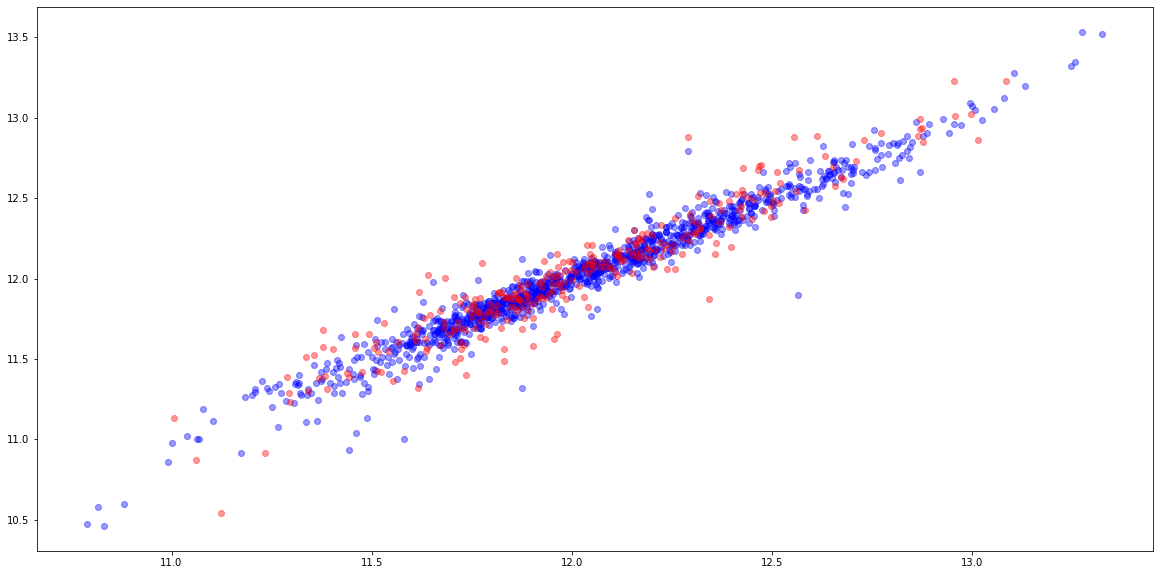

In [58]:
# {'learning_rate': 0.1573, 'max_depth': 6, 'max_features': 14, 'min_impurity_decrease': 0.0022,
#  'min_samples_leaf': 10, 'min_samples_split': 8, 'n_estimators': 2040, 'subsample': 1.0, 'warm_start': True}

import time
t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)
print(current_time)

gbm = GradientBoostingRegressor(loss='ls', tol=1e-3, n_iter_no_change=10, validation_fraction=0.2)

learningrate = [0.1573]

maxdepth = [6]
maxfeatures = [11, 12, 13, 14, 15]

minimpdec = [0.00215, 0.0022, 0.00225]
minsamlf = [10]
minsamsplt = [8]

nestimators = [2035, 2040, 2045]
subsamp = [0.095, 1.0, 1.05]

warmstart = [True]

gparam_gbm = {'learning_rate': learningrate,
              'max_depth': maxdepth,
              'max_features': maxfeatures,
              'min_impurity_decrease': minimpdec,
              'min_samples_leaf': minsamlf,
              'min_samples_split': minsamsplt,
              'n_estimators': nestimators,
              'subsample': subsamp,         
              'warm_start': warmstart
             }

n_folds=ms.KFold(n_splits=5, random_state=0, shuffle=True)

gs_gbm = GridSearchCV(gbm, gparam_gbm, cv=n_folds, refit=True, n_jobs=-1, 
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_gbm.fit(xtrain_gb_out, ytrain_gb_out)

print('#'*50)
print('\n')

print('Currently, the best parameters are: ', gs_gbm.best_params_)

print('#'*50)
print('\n')

print('The best score is: ', gs_gbm.best_estimator_.score(xtrain_gb_out, ytrain_gb_out))

print('#'*50)
print('\n')

print('The RMSE is: ', rmse(gs_gbm, ytrain_gb_out, xtrain_gb_out))

print('#'*50)
print('\n')


print('The test set RMSE is: ', rmse(gs_gbm, ytest_gb_out, xtest_gb_out))
plt.figure(figsize=(20, 10))
plt.scatter(gs_gbm.best_estimator_.predict(xtrain_gb_out), ytrain_gb_out, color='blue', alpha=0.4)
plt.scatter(gs_gbm.best_estimator_.predict(xtest_gb_out), ytest_gb_out, color='red', alpha=0.4)

17:54:06
Wall time: 14.5 s
##################################################


Currently, the best parameters are:  {'learning_rate': 0.1573, 'max_depth': 6, 'max_features': 15, 'min_impurity_decrease': 0.00218, 'min_samples_leaf': 10, 'min_samples_split': 8, 'n_estimators': 2040, 'subsample': 1.0, 'warm_start': True}
##################################################


The best score is:  0.9586305938661152
##################################################


The RMSE is:  0.08063275928512255
##################################################


The test set RMSE is:  0.13165908764626202


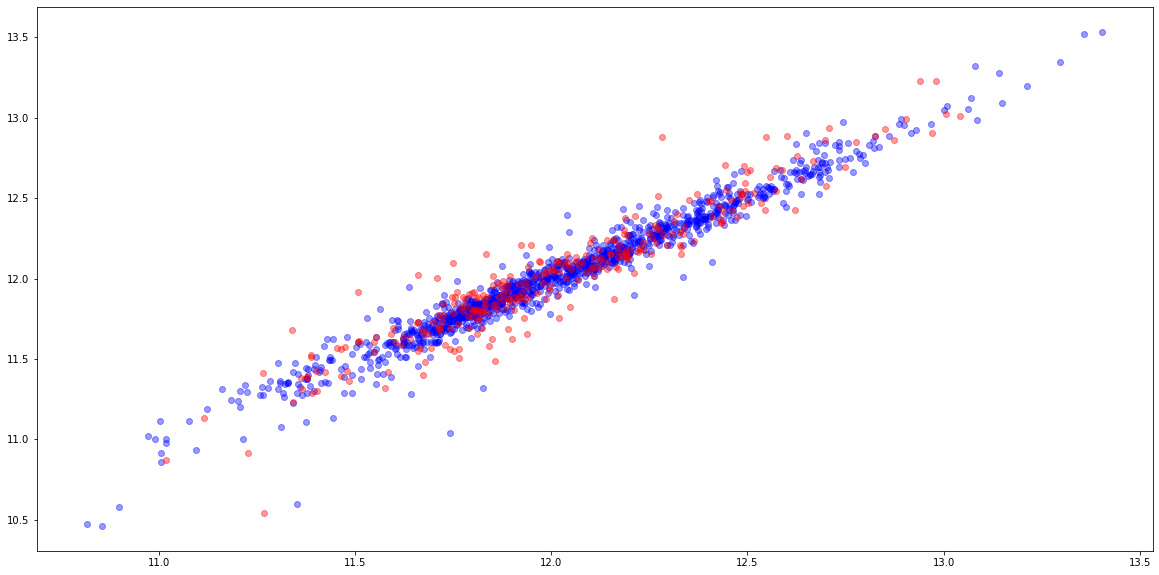

In [59]:
# {'learning_rate': 0.1573, 'max_depth': 6, 'max_features': 14, 'min_impurity_decrease': 0.0022,
#  'min_samples_leaf': 10, 'min_samples_split': 8, 'n_estimators': 2040, 'subsample': 1.0, 'warm_start': True}

import time
t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)
print(current_time)

gbm = GradientBoostingRegressor(loss='ls', tol=1e-3, n_iter_no_change=10, validation_fraction=0.2)

learningrate = [0.1573]

maxdepth = [6]
maxfeatures = [11, 12, 13, 14, 15]

minimpdec = [0.00215, 0.00216, 0.00217, 0.00218, 0.00219, 0.0022, 0.00221]
minsamlf = [10]
minsamsplt = [8]

nestimators = [2040, 2041, 2042, 2043, 2044, 2045]
subsamp = [0.095, 1.0, 1.05]

warmstart = [True]

gparam_gbm = {'learning_rate': learningrate,
              'max_depth': maxdepth,
              'max_features': maxfeatures,
              'min_impurity_decrease': minimpdec,
              'min_samples_leaf': minsamlf,
              'min_samples_split': minsamsplt,
              'n_estimators': nestimators,
              'subsample': subsamp,         
              'warm_start': warmstart
             }

n_folds=ms.KFold(n_splits=5, random_state=0, shuffle=True)

gs_gbm = GridSearchCV(gbm, gparam_gbm, cv=n_folds, refit=True, n_jobs=-1, 
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_gbm.fit(xtrain_gb_out, ytrain_gb_out)

print('#'*50)
print('\n')

print('Currently, the best parameters are: ', gs_gbm.best_params_)

print('#'*50)
print('\n')

print('The best score is: ', gs_gbm.best_estimator_.score(xtrain_gb_out, ytrain_gb_out))

print('#'*50)
print('\n')

print('The RMSE is: ', rmse(gs_gbm, ytrain_gb_out, xtrain_gb_out))

print('#'*50)
print('\n')


print('The test set RMSE is: ', rmse(gs_gbm, ytest_gb_out, xtest_gb_out))
plt.figure(figsize=(20, 10))
plt.scatter(gs_gbm.best_estimator_.predict(xtrain_gb_out), ytrain_gb_out, color='blue', alpha=0.4)
plt.scatter(gs_gbm.best_estimator_.predict(xtest_gb_out), ytest_gb_out, color='red', alpha=0.4)

17:59:25
Wall time: 398 ms
##################################################


Currently, the best parameters are:  {'learning_rate': 0.1573, 'max_depth': 6, 'max_features': 14, 'min_impurity_decrease': 0.0022, 'min_samples_leaf': 10, 'min_samples_split': 8, 'n_estimators': 2039, 'subsample': 1.0, 'warm_start': True}
##################################################


The best score is:  0.9519212177435258
##################################################


The RMSE is:  0.08692578235716843
##################################################


The test set RMSE is:  0.12931352226828993


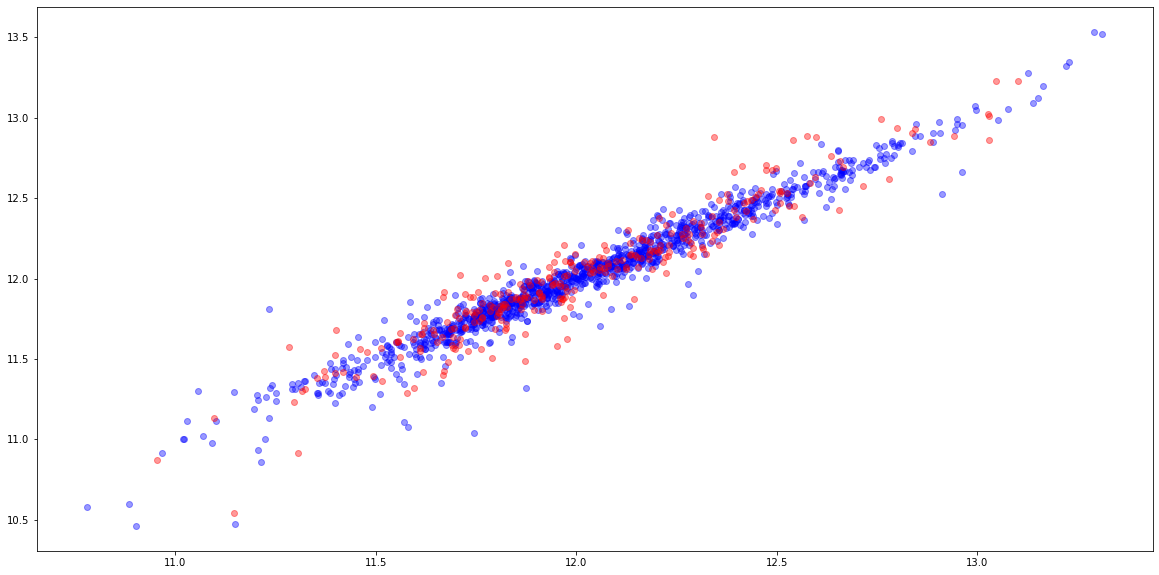

In [61]:
# {'learning_rate': 0.1573, 'max_depth': 6, 'max_features': 14, 'min_impurity_decrease': 0.0022,
#  'min_samples_leaf': 10, 'min_samples_split': 8, 'n_estimators': 2040, 'subsample': 1.0, 'warm_start': True}

import time
t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)
print(current_time)

gbm = GradientBoostingRegressor(loss='ls', tol=1e-3, n_iter_no_change=10, validation_fraction=0.2)

learningrate = [0.1573]

maxdepth = [6]
maxfeatures = [14]

minimpdec = [0.0022]
minsamlf = [10]
minsamsplt = [8]

nestimators = [2038, 2039, 2040, 2041]
subsamp = [0.095, 1.0, 1.05]

warmstart = [True]

gparam_gbm = {'learning_rate': learningrate,
              'max_depth': maxdepth,
              'max_features': maxfeatures,
              'min_impurity_decrease': minimpdec,
              'min_samples_leaf': minsamlf,
              'min_samples_split': minsamsplt,
              'n_estimators': nestimators,
              'subsample': subsamp,         
              'warm_start': warmstart
             }

n_folds=ms.KFold(n_splits=5, random_state=0, shuffle=True)

gs_gbm = GridSearchCV(gbm, gparam_gbm, cv=n_folds, refit=True, n_jobs=-1, 
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_gbm.fit(xtrain_gb_out, ytrain_gb_out)

print('#'*50)
print('\n')

print('Currently, the best parameters are: ', gs_gbm.best_params_)

print('#'*50)
print('\n')

print('The best score is: ', gs_gbm.best_estimator_.score(xtrain_gb_out, ytrain_gb_out))

print('#'*50)
print('\n')

print('The RMSE is: ', rmse(gs_gbm, ytrain_gb_out, xtrain_gb_out))

print('#'*50)
print('\n')


print('The test set RMSE is: ', rmse(gs_gbm, ytest_gb_out, xtest_gb_out))
plt.figure(figsize=(20, 10))
plt.scatter(gs_gbm.best_estimator_.predict(xtrain_gb_out), ytrain_gb_out, color='blue', alpha=0.4)
plt.scatter(gs_gbm.best_estimator_.predict(xtest_gb_out), ytest_gb_out, color='red', alpha=0.4)

# FINAL PARAMETERS FOR GBR

18:01:17
Wall time: 150 ms
##################################################


Currently, the best parameters are:  {'learning_rate': 0.1573, 'max_depth': 6, 'max_features': 14, 'min_impurity_decrease': 0.0022, 'min_samples_leaf': 10, 'min_samples_split': 8, 'n_estimators': 2039, 'subsample': 1.0, 'warm_start': True}
##################################################


The best score is:  0.9545536028906351
##################################################


The RMSE is:  0.08451262825253937
##################################################


The test set RMSE is:  0.1318980193791296


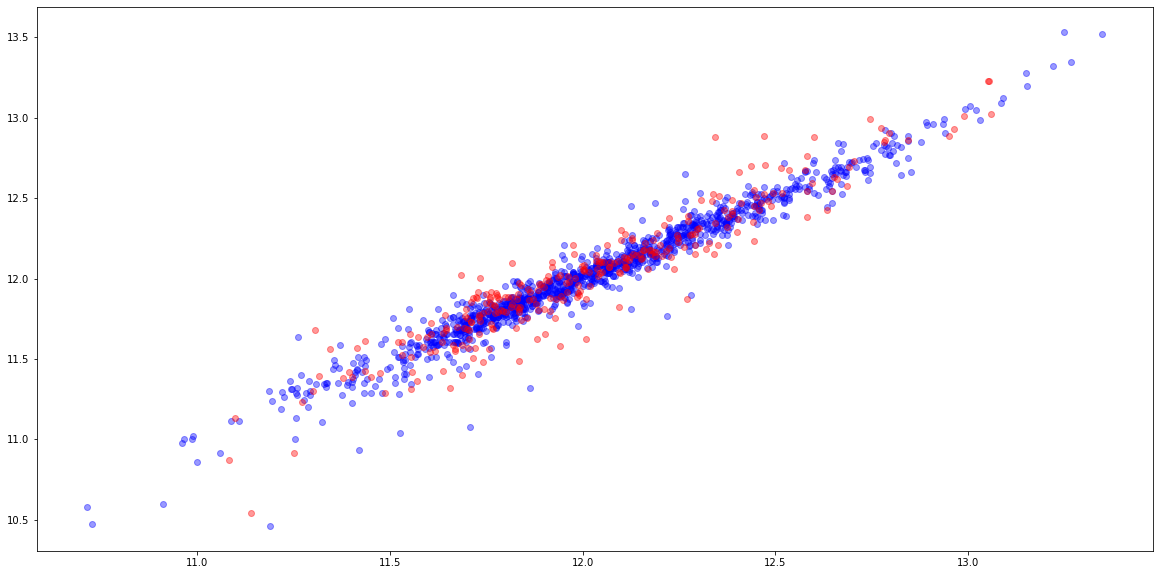

In [62]:
# {'learning_rate': 0.1573, 'max_depth': 6, 'max_features': 14, 'min_impurity_decrease': 0.0022,
#  'min_samples_leaf': 10, 'min_samples_split': 8, 'n_estimators': 2040, 'subsample': 1.0, 'warm_start': True}

import time
t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)
print(current_time)

gbm = GradientBoostingRegressor(loss='ls', tol=1e-3, n_iter_no_change=10, validation_fraction=0.2)

learningrate = [0.1573]

maxdepth = [6]
maxfeatures = [14]

minimpdec = [0.0022]
minsamlf = [10]
minsamsplt = [8]

nestimators = [2039]
subsamp = [1.0]

warmstart = [True]

gparam_gbm = {'learning_rate': learningrate,
              'max_depth': maxdepth,
              'max_features': maxfeatures,
              'min_impurity_decrease': minimpdec,
              'min_samples_leaf': minsamlf,
              'min_samples_split': minsamsplt,
              'n_estimators': nestimators,
              'subsample': subsamp,         
              'warm_start': warmstart
             }

n_folds=ms.KFold(n_splits=5, random_state=0, shuffle=True)

gs_gbm = GridSearchCV(gbm, gparam_gbm, cv=n_folds, refit=True, n_jobs=-1, 
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_gbm.fit(xtrain_gb_out, ytrain_gb_out)

print('#'*50)
print('\n')

print('Currently, the best parameters are: ', gs_gbm.best_params_)

print('#'*50)
print('\n')

print('The best score is: ', gs_gbm.best_estimator_.score(xtrain_gb_out, ytrain_gb_out))

print('#'*50)
print('\n')

print('The RMSE is: ', rmse(gs_gbm, ytrain_gb_out, xtrain_gb_out))

print('#'*50)
print('\n')


print('The test set RMSE is: ', rmse(gs_gbm, ytest_gb_out, xtest_gb_out))
plt.figure(figsize=(20, 10))
plt.scatter(gs_gbm.best_estimator_.predict(xtrain_gb_out), ytrain_gb_out, color='blue', alpha=0.4)
plt.scatter(gs_gbm.best_estimator_.predict(xtest_gb_out), ytest_gb_out, color='red', alpha=0.4)

# RANDOM FOREST

18:13:13
Wall time: 1h 17min 44s
##################################################


Currently, the best parameters are:  {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 2500, 'oob_score': False, 'warm_start': False}
##################################################


The best score is:  0.978464973098845
##################################################


The RMSE is:  0.058176097868502155
##################################################


The test set RMSE is:  0.13646071857318606


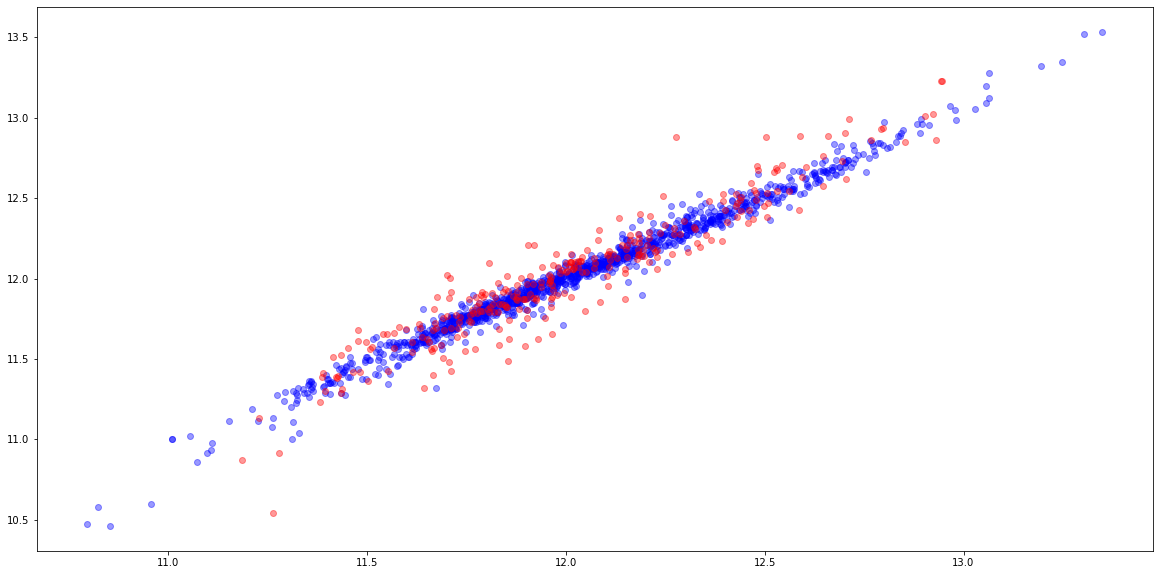

In [65]:
import time
t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)
print(current_time)

rfr = RandomForestRegressor()

# learningrate = [0.01, 0.1, 0.5]

maxdepth = [9, 30, 50, 80]
# maxfeatures = [14]

# minimpdec = [0.0022]
minsamlf = [1, 5, 10]
minsamsplt = [1, 5, 10]

nestimators = [10, 100, 1000, 2500, 5000]
oobscore = [True, False]

warmstart = [True, False]

gparam_rfr = {'max_depth': maxdepth,
              'min_samples_leaf': minsamlf,
              'min_samples_split': minsamsplt,
              'n_estimators': nestimators,
              'oob_score': oobscore,
              'warm_start': warmstart
             }

n_folds=ms.KFold(n_splits=5, random_state=0, shuffle=True)

gs_rfr = GridSearchCV(rfr, gparam_rfr, cv=n_folds, refit=True, n_jobs=-1, 
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_rfr.fit(xtrain_gb_out, ytrain_gb_out)

print('#'*50)
print('\n')

print('Currently, the best parameters are: ', gs_rfr.best_params_)

print('#'*50)
print('\n')

print('The best score is: ', gs_rfr.best_estimator_.score(xtrain_gb_out, ytrain_gb_out))

print('#'*50)
print('\n')

print('The RMSE is: ', rmse(gs_rfr, ytrain_gb_out, xtrain_gb_out))

print('#'*50)
print('\n')


print('The test set RMSE is: ', rmse(gs_rfr, ytest_gb_out, xtest_gb_out))
plt.figure(figsize=(20, 10))
plt.scatter(gs_rfr.best_estimator_.predict(xtrain_gb_out), ytrain_gb_out, color='blue', alpha=0.4)
plt.scatter(gs_rfr.best_estimator_.predict(xtest_gb_out), ytest_gb_out, color='red', alpha=0.4)

19:40:43
Wall time: 1h 32min 57s
##################################################


Currently, the best parameters are:  {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 2000, 'oob_score': False, 'warm_start': False}
##################################################


The best score is:  0.9762407178648845
##################################################


The RMSE is:  0.06110665850614707
##################################################


The test set RMSE is:  0.13546818985435885


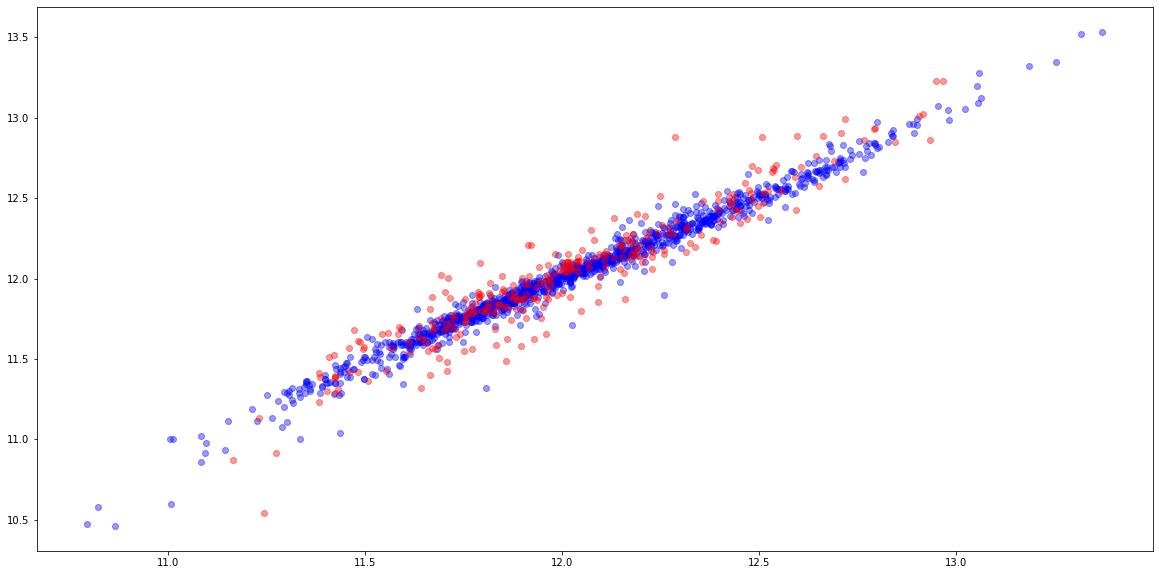

In [66]:
# {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 2500, 'oob_score': False, 'warm_start': False}

import time
t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)
print(current_time)

rfr = RandomForestRegressor()

# learningrate = [0.01, 0.1, 0.5]

maxdepth = [20, 30, 40]
# maxfeatures = [14]

# minimpdec = [0.0022]
minsamlf = [1, 2, 3]
minsamsplt = [4, 5, 6]

nestimators = [2000, 2500, 3000]
oobscore = [True, False]

warmstart = [True, False]

gparam_rfr = {'max_depth': maxdepth,
              'min_samples_leaf': minsamlf,
              'min_samples_split': minsamsplt,
              'n_estimators': nestimators,
              'oob_score': oobscore,
              'warm_start': warmstart
             }

n_folds=ms.KFold(n_splits=5, random_state=0, shuffle=True)

gs_rfr = GridSearchCV(rfr, gparam_rfr, cv=n_folds, refit=True, n_jobs=-1, 
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_rfr.fit(xtrain_gb_out, ytrain_gb_out)

print('#'*50)
print('\n')

print('Currently, the best parameters are: ', gs_rfr.best_params_)

print('#'*50)
print('\n')

print('The best score is: ', gs_rfr.best_estimator_.score(xtrain_gb_out, ytrain_gb_out))

print('#'*50)
print('\n')

print('The RMSE is: ', rmse(gs_rfr, ytrain_gb_out, xtrain_gb_out))

print('#'*50)
print('\n')


print('The test set RMSE is: ', rmse(gs_rfr, ytest_gb_out, xtest_gb_out))
plt.figure(figsize=(20, 10))
plt.scatter(gs_rfr.best_estimator_.predict(xtrain_gb_out), ytrain_gb_out, color='blue', alpha=0.4)
plt.scatter(gs_rfr.best_estimator_.predict(xtest_gb_out), ytest_gb_out, color='red', alpha=0.4)

In [39]:
xtrain_gb_out, xtest_gb_out, ytrain_gb_out, ytest_gb_out = ms.train_test_split(hp_tree_fullyimputed_noOutliers, 
                                                               hp_logsaleprice_noOutliers, test_size=0.2, random_state=0)

ytrain_gb_out = ytrain_gb_out.values.flatten()

In [23]:
gbm = GradientBoostingRegressor(random_state=0,
                                loss='ls',
                                min_impurity_decrease=0.1,
                                warm_start=False)

learningrate = [0.0001, 0.001, 0.01, 0.1, 1] # subsequently, fine tune
nestimators = [5, 10, 50, 100, 200, 500, 1000, 1500, 2000, 5000]

maxfeatures = [9, 40, len(hp_tree_fullyimputed.columns)]
maxdepth = range(1, 5)

gparam_gbm = {'learning_rate': learningrate,
              'n_estimators': nestimators,
              'max_features': maxfeatures,
              'max_depth': maxdepth}

n_folds=ms.KFold(n_splits=5, random_state=0, shuffle=True)

gs_gbm = GridSearchCV(gbm, gparam_gbm, cv=n_folds, refit=True, n_jobs=-1, 
                      scoring='neg_root_mean_squared_error', return_train_score=True)

print(gs_gbm.fit(xtrain_gb, ytrain_gb))

print('#'*50)
print('\n')

print('Currently, the best parameters are: ', gs_gbm.best_params_)

print('where the alpha is: ', gs_gbm.best_params_['learning_rate'])
print('and the L1 ratio is: ', gs_gbm.best_params_['n_estimators'])
print('where the alpha is: ', gs_gbm.best_params_['max_features'])
print('and the L1 ratio is: ', gs_gbm.best_params_['max_depth'])

print('#'*50)
print('\n')

print('The best score is: ', gs_gbm.best_estimator_.score(xtrain_gb, ytrain_gb))

print('#'*50)
print('\n')

print('The RMSE is: ', rmse(gs_gbm, ytrain_gb, xtrain_gb))

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.1,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight...
                                                 tol=0.0001,
                                                 val

The test set RMSE is:  0.13009876536563167


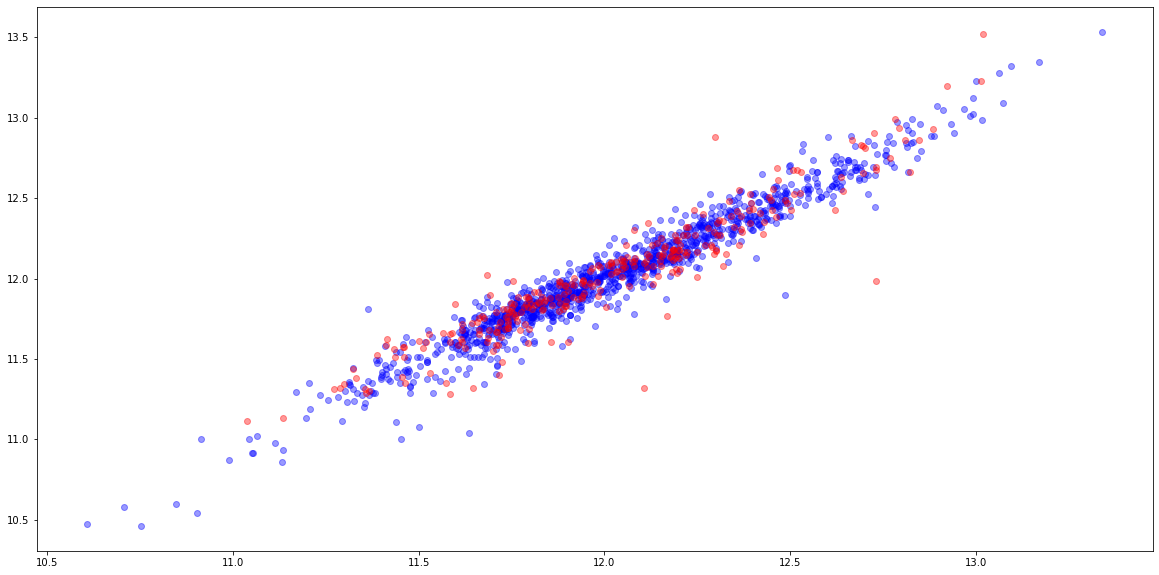

In [24]:
print('The test set RMSE is: ', rmse(gs_gbm, ytest_gb, xtest_gb))

plt.figure(figsize=(20, 10))
plt.scatter(gs_gbm.best_estimator_.predict(xtrain_gb), ytrain, color='blue', alpha=0.4)
plt.scatter(gs_gbm.best_estimator_.predict(xtest_gb), ytest, color='red', alpha=0.4)

In [25]:
gbm = GradientBoostingRegressor(random_state=0)

learningrate = np.logspace(-3, -1, 20) 
nestimators = np.linspace(3000, 7000, 20)
maxfeatures = list(range(1, 20))
maxdepth = list(range(1, 5))

gparam_gbm = {'learning_rate': learningrate,
              'n_estimators': nestimators, 
              'max_features': maxfeatures,
              'max_depth': maxdepth}

n_folds=ms.KFold(n_splits=5, random_state=0, shuffle=True)

gs_gbm = GridSearchCV(gbm, gparam_gbm, cv=n_folds, refit=True, n_jobs=-1, 
                      scoring='neg_root_mean_squared_error', return_train_score=True)

print(gs_gbm.fit(xtrain_gb, ytrain_gb))

print('#'*50)
print('\n')

print('Currently, the best parameters are: ', gs_gbm.best_params_)

print('where the alpha is: ', gs_gbm.best_params_['learning_rate'])
print('and the L1 ratio is: ', gs_gbm.best_params_['n_estimators'])
print('where the alpha is: ', gs_gbm.best_params_['max_features'])
print('and the L1 ratio is: ', gs_gbm.best_params_['max_depth'])

print('#'*50)
print('\n')

print('The best score is: ', gs_gbm.best_estimator_.score(xtrain_gb, ytrain_gb))

print('#'*50)
print('\n')

print('The RMSE is: ', rmse(gs_gbm, ytrain_gb, xtrain_gb))

TypeError: 'numpy.float64' object cannot be interpreted as an integer

In [ ]:
print('The test set RMSE is: ', rmse(gs_gbm, ytest_gb, xtest_gb))

plt.figure(figsize=(20, 10))
plt.scatter(gs_gbm.best_estimator_.predict(xtrain_gb), ytrain, color='blue', alpha=0.4)
plt.scatter(gs_gbm.best_estimator_.predict(xtest_gb), ytest, color='red', alpha=0.4)

In [ ]:
print(gs_gbm.best_params_)
print(gs_gbm.best_score_)

## XGBoost

In [52]:
xgb = XGBRegressor(random_state=0, eval_method='rmse', tree_method='gpu_hist')

In [28]:
maxdepth = range(2, 6)
eta_ = np.linspace(1e-2, 1, 10)
gamma_ = np.linspace(1e-5, 100, 30)
subsample_ = np.linspace(0, 1, 3)
# updater_ = [grow_colmaker,prune,grow_gpu_hist]

n_folds=ms.KFold(n_splits=5, random_state=0, shuffle=True)

gparam_xgb = {'max_depth': maxdepth,
              'eta': eta_,
              'gamma': gamma_,
              'subsample': subsample_}

gs_xgb = GridSearchCV(xgb, gparam_xgb, cv=n_folds, refit=True, n_jobs=-1, 
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_xgb.fit(xtrain_gb, ytrain_gb)

print('#'*50)
print('\n')

print('Currently, the best parameters are: ', gs_xgb.best_params_)

print('where the learning rate is: ', gs_xgb.best_params_['eta'])
print('and the L1 ratio is: ', gs_xgb.best_params_['max_depth'])
print('where the alpha is: ', gs_xgb.best_params_['gamma'])
print('and the L1 ratio is: ', gs_xgb.best_params_['subsample'])

print('#'*50)
print('\n')

print('The best score is: ', gs_xgb.best_estimator_.score(xtrain_gb, ytrain_gb))

print('#'*50)
print('\n')

print('The RMSE is: ', rmse(gs_xgb, ytrain_gb, xtrain_gb))

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             error_score=nan,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    mi...
       5.51724183e+01, 5.86206938e+01, 6.20689693e+01, 6.55172448e+01,
       6.89655203e+01, 7.24137959e+01, 7.58620714e+01, 7.93103469e+01,
       8.27586224e+01, 8.62068979e+01, 8.96551734e+01, 9.31034490e+01,
       9.65517245e+01, 1.00000000e+02]),
                         'max_depth': range(2, 6),
          

In [49]:
gs_xgb.cv_results_

{'mean_fit_time': array([0.5306603 , 0.59104338, 0.52438135, ..., 0.21239972, 1.00230031,
        1.00429955]),
 'std_fit_time': array([0.01911111, 0.00809987, 0.11815281, ..., 0.01315443, 0.03631291,
        0.03812599]),
 'mean_score_time': array([0.00619988, 0.00729918, 0.00652547, ..., 0.00639992, 0.00609965,
        0.00539985]),
 'std_score_time': array([0.00039986, 0.00067954, 0.00104403, ..., 0.00131904, 0.00048877,
        0.00058301]),
 'param_eta': masked_array(data=[0.01, 0.01, 0.01, ..., 1.0, 1.0, 1.0],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_gamma': masked_array(data=[1e-05, 1e-05, 1e-05, ..., 100.0, 100.0, 100.0],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[2, 2, 2, ..., 5, 5, 5],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',


The test set RMSE is:  0.13215847683560447


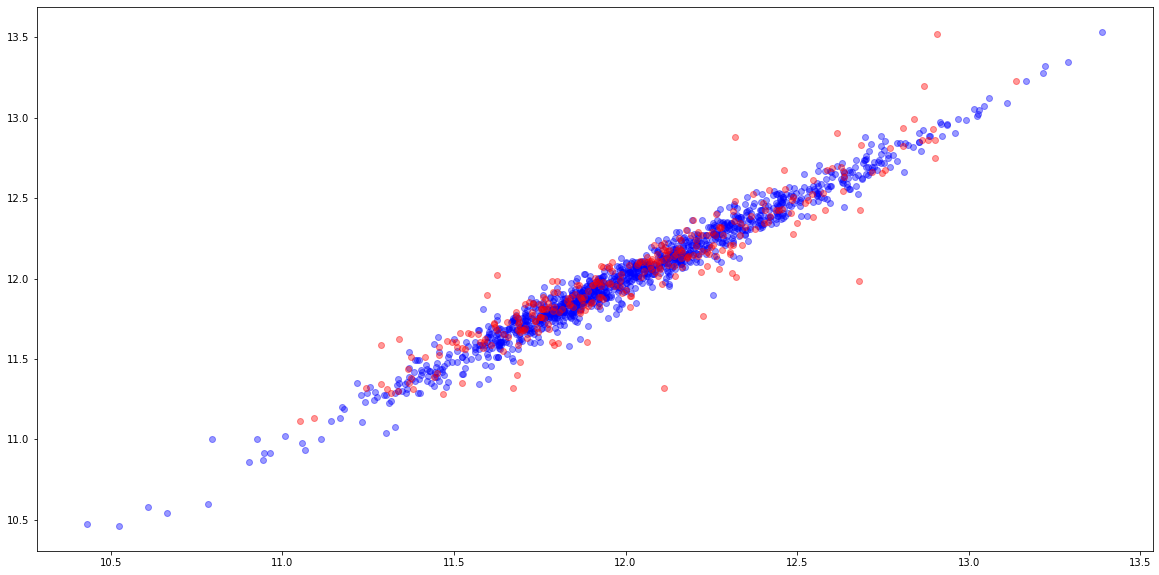

In [29]:
print('The test set RMSE is: ', rmse(gs_xgb, ytest_gb, xtest_gb))

plt.figure(figsize=(20, 10))
plt.scatter(gs_xgb.best_estimator_.predict(xtrain_gb), ytrain, color='blue', alpha=0.4)
plt.scatter(gs_xgb.best_estimator_.predict(xtest_gb), ytest, color='red', alpha=0.4)

## Run with Lasso Prediction

In [54]:
maxdepth = range(2, 6)
eta_ = np.linspace(1e-2, 1, 10)
gamma_ = np.linspace(1e-5, 100, 30)
subsample_ = np.linspace(0, 1, 3)
# updater_ = [grow_colmaker,prune,grow_gpu_hist]

n_folds=ms.KFold(n_splits=5, random_state=0, shuffle=True)

gparam_xgb = {'max_depth': maxdepth,
              'eta': eta_,
              'gamma': gamma_,
              'subsample': subsample_}

gs_xgb = GridSearchCV(xgb, gparam_xgb, cv=n_folds, refit=True, n_jobs=-1, 
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_xgb.fit(xtrain_gb_out, lasso_trained_label)

print('#'*50)
print('\n')

print('Currently, the best parameters are: ', gs_xgb.best_params_)

print('where the learning rate is: ', gs_xgb.best_params_['eta'])
print('and the L1 ratio is: ', gs_xgb.best_params_['max_depth'])
print('where the alpha is: ', gs_xgb.best_params_['gamma'])
print('and the L1 ratio is: ', gs_xgb.best_params_['subsample'])

print('#'*50)
print('\n')

print('The best score is: ', gs_xgb.best_estimator_.score(xtrain_gb_out, lasso_trained_label))

print('#'*50)
print('\n')

print('The RMSE is: ', rmse(gs_xgb, lasso_trained_label, xtrain_gb_out))

KeyboardInterrupt: 

##################################################




AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [ ]:
print('The test set RMSE is: ', rmse(gs_xgb, ytest_gb, xtest_gb))

plt.figure(figsize=(20, 10))
plt.scatter(gs_xgb.best_estimator_.predict(xtrain_gb), lasso_trained_label, color='blue', alpha=0.4)
plt.scatter(gs_xgb.best_estimator_.predict(xtest_gb), ytest, color='red', alpha=0.4

In [ ]:
### Due to the low RMSE, we will attempt XGBoost with 

In [42]:
hp_nonimpute = pd.read_csv('../hp_nonimpute.csv')
hp_nonimpute

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,6,65.0,8450,2,NaN,1,1,1,1,1,6,3,3,1,4,7,5,2003,2003,2,2,15,15,2.0,196.0,2,3,3,2.0,3.0,4.0,1.0,706,6.0,0,150,856,2,1,1,1.0,856,854,0,1710,1,0,2,1,3,1,2,8,1,0,NaN,2.0,2003.0,2.0,2,548,3.0,3.0,1,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,1,1
1,20,6,80.0,9600,2,NaN,1,1,1,4,1,25,2,3,1,1,6,8,1976,1976,2,2,9,9,4.0,0.0,3,3,2,2.0,3.0,1.0,2.0,978,6.0,0,284,1262,2,1,1,1.0,1262,0,0,1262,0,1,2,0,3,1,3,6,1,1,3.0,2.0,1976.0,2.0,2,460,3.0,3.0,1,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,1,1
2,60,6,68.0,11250,2,NaN,2,1,1,1,1,6,3,3,1,4,7,5,2001,2002,2,2,15,15,2.0,162.0,2,3,3,2.0,3.0,3.0,1.0,486,6.0,0,434,920,2,1,1,1.0,920,866,0,1786,1,0,2,1,3,1,2,6,1,1,3.0,2.0,2001.0,2.0,2,608,3.0,3.0,1,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,1,1
3,70,6,60.0,9550,2,NaN,2,1,1,2,1,7,3,3,1,4,7,5,1915,1970,2,2,16,17,4.0,0.0,3,3,1,3.0,2.0,4.0,2.0,216,6.0,0,540,756,2,2,1,1.0,961,756,0,1717,1,0,1,0,3,1,2,7,1,1,2.0,6.0,1998.0,3.0,3,642,3.0,3.0,1,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,1,2
4,60,6,84.0,14260,2,NaN,2,1,1,4,1,14,3,3,1,4,8,5,2000,2000,2,2,15,15,2.0,350.0,2,3,3,2.0,3.0,2.0,1.0,655,6.0,0,490,1145,2,1,1,1.0,1145,1053,0,2198,1,0,2,1,4,1,2,9,1,1,3.0,2.0,2000.0,2.0,3,836,3.0,3.0,1,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,6,62.0,7917,2,NaN,1,1,1,1,1,9,3,3,1,4,6,5,1999,2000,2,2,15,15,4.0,0.0,3,3,3,2.0,3.0,4.0,6.0,0,6.0,0,953,953,2,1,1,1.0,953,694,0,1647,0,0,2,1,3,1,3,7,1,1,3.0,2.0,1999.0,2.0,2,460,3.0,3.0,1,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,1,1
1456,20,6,85.0,13175,2,NaN,1,1,1,1,1,17,3,3,1,1,6,6,1978,1988,2,2,11,11,5.0,119.0,3,3,2,2.0,3.0,4.0,2.0,790,4.0,163,589,1542,2,3,1,1.0,2073,0,0,2073,1,0,2,0,3,1,3,7,2,2,3.0,2.0,1978.0,3.0,2,500,3.0,3.0,1,349,0,0,0,0,0,NaN,2.0,NaN,0,2,2010,1,1
1457,70,6,66.0,9042,2,NaN,1,1,1,1,1,7,3,3,1,4,7,9,1941,2006,2,2,6,6,4.0,0.0,1,2,5,3.0,2.0,4.0,1.0,275,6.0,0,877,1152,2,1,1,1.0,1188,1152,0,2340,0,0,2,0,4,1,2,9,1,2,2.0,2.0,1941.0,2.0,1,252,3.0,3.0,1,0,60,0,0,0,0,NaN,1.0,4.0,2500,5,2010,1,1
1458,20,6,68.0,9717,2,NaN,1,1,1,1,1,13,3,3,1,1,5,6,1950,1996,4,2,9,9,4.0,0.0,3,3,2,3.0,3.0,3.0,1.0,49,4.0,1029,0,1078,2,2,1,2.0,1078,0,0,1078,1,0,1,0,2,1,2,5,1,0,NaN,2.0,1950.0,3.0,1,240,3.0,3.0,1,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,1,1


In [43]:
xtrain_nonimpute, xtest_nonimpute, ytrain_nonimpute, ytest_nonimpute = ms.train_test_split(hp_tree_fullyimputed, 
                                                                                           hp_logsaleprice, 
                                                                                           test_size=0.2, 
                                                                                           random_state=0)

ytrain_nonimpute = ytrain_nonimpute.values.flatten()

In [47]:
xgb = XGBRegressor(random_state=0)

xgb.fit(xtrain_nonimpute, ytrain_nonimpute)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=12, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [ ]:
maxdepth = range(2, 6)
eta_ = np.linspace(1e-2, 1, 10)
gamma_ = np.linspace(1e-5, 100, 30)
subsample_ = np.linspace(0, 1, 3)
# updater_ = [grow_colmaker,prune,grow_gpu_hist]

n_folds=ms.KFold(n_splits=5, random_state=0, shuffle=True)

gparam_xgb = {'max_depth': maxdepth,
              'eta': eta_,
              'gamma': gamma_,
              'subsample': subsample_}

gs_xgb = GridSearchCV(xgb, gparam_xgb, cv=n_folds, refit=True, n_jobs=-1, 
                      scoring='neg_root_mean_squared_error', return_train_score=True)

print(gs_xgb.fit(xtrain_gb, ytrain_gb))

print('#'*50)
print('\n')

print('Currently, the best parameters are: ', gs_xgb.best_params_)

print('where the learning rate is: ', gs_xgb.best_params_['eta'])
print('and the L1 ratio is: ', gs_xgb.best_params_['max_depth'])
print('where the alpha is: ', gs_xgb.best_params_['gamma'])
print('and the L1 ratio is: ', gs_xgb.best_params_['subsample'])

print('#'*50)
print('\n')

print('The best score is: ', gs_xgb.best_estimator_.score(xtrain_gb, ytrain_gb))

print('#'*50)
print('\n')

print('The RMSE is: ', rmse(gs_xgb, ytrain_gb, xtrain_gb))